<a href="https://colab.research.google.com/github/eco-abhi/Pytorch/blob/main/Pytorch_ANN_MNIST_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

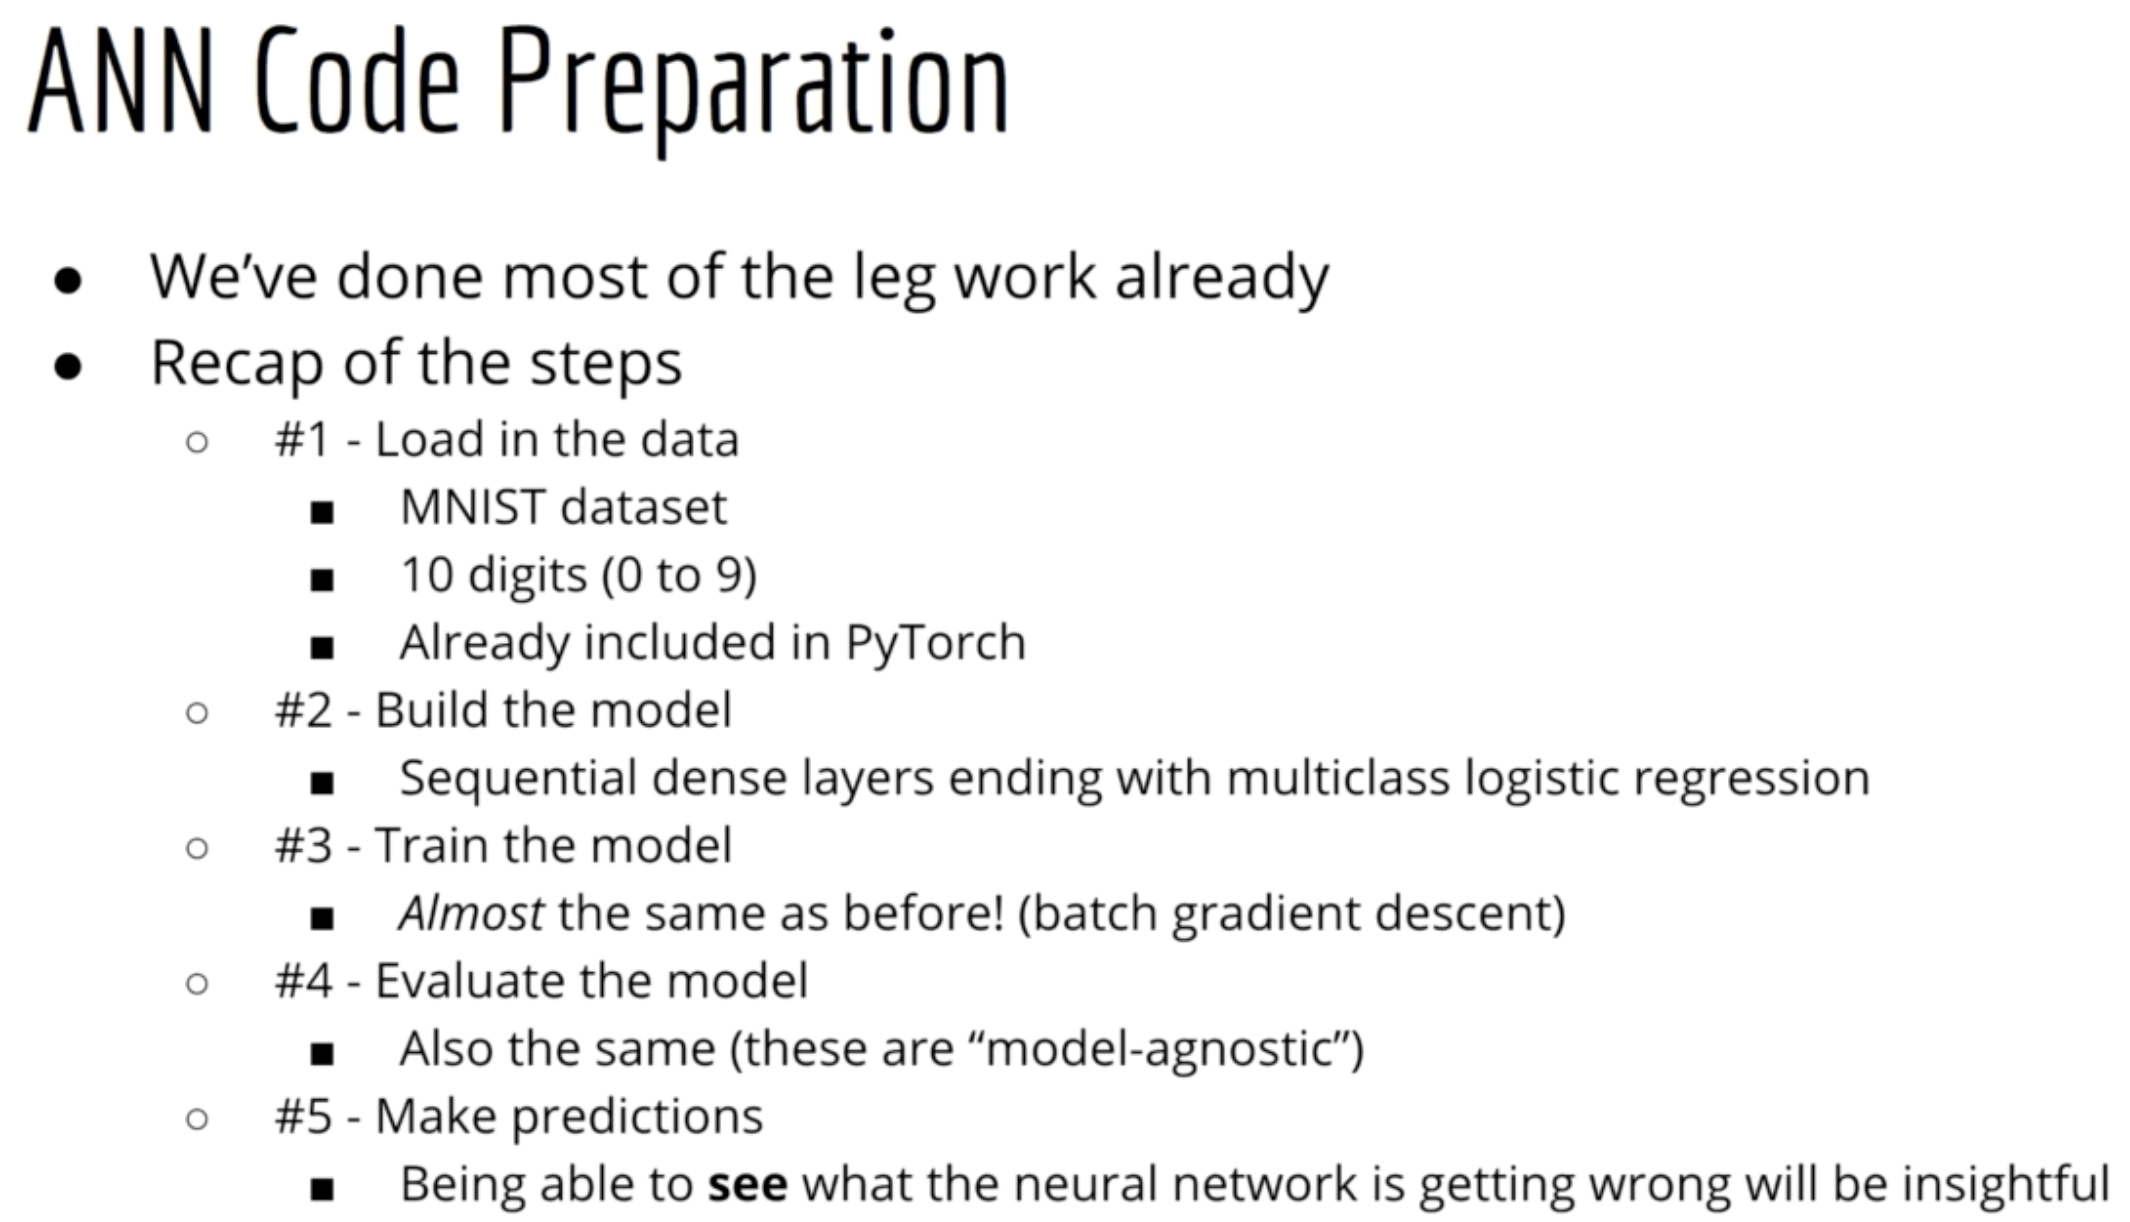

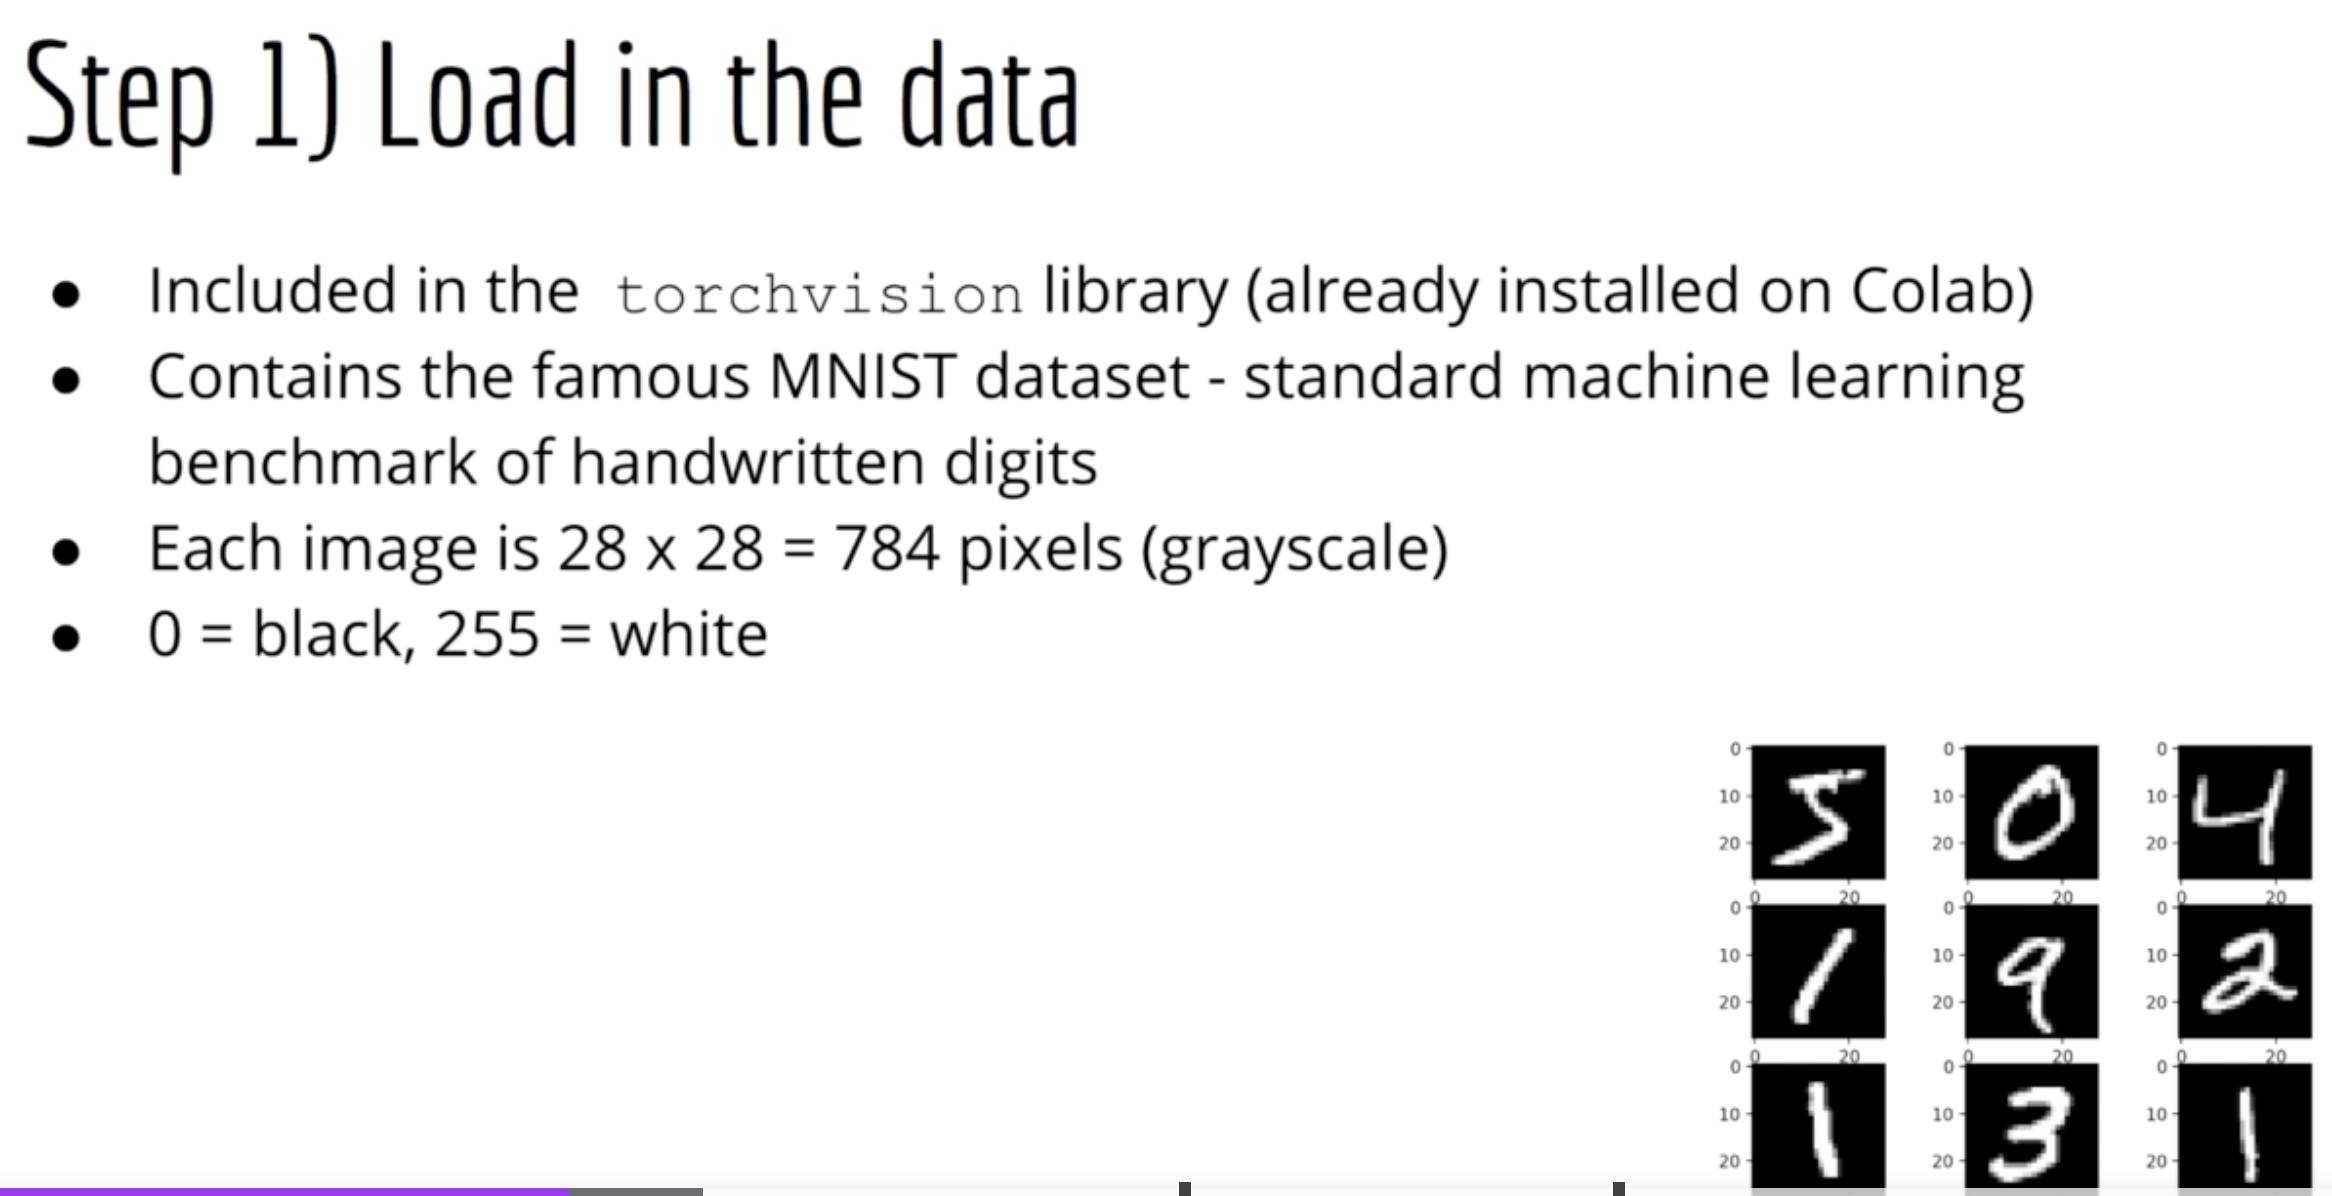

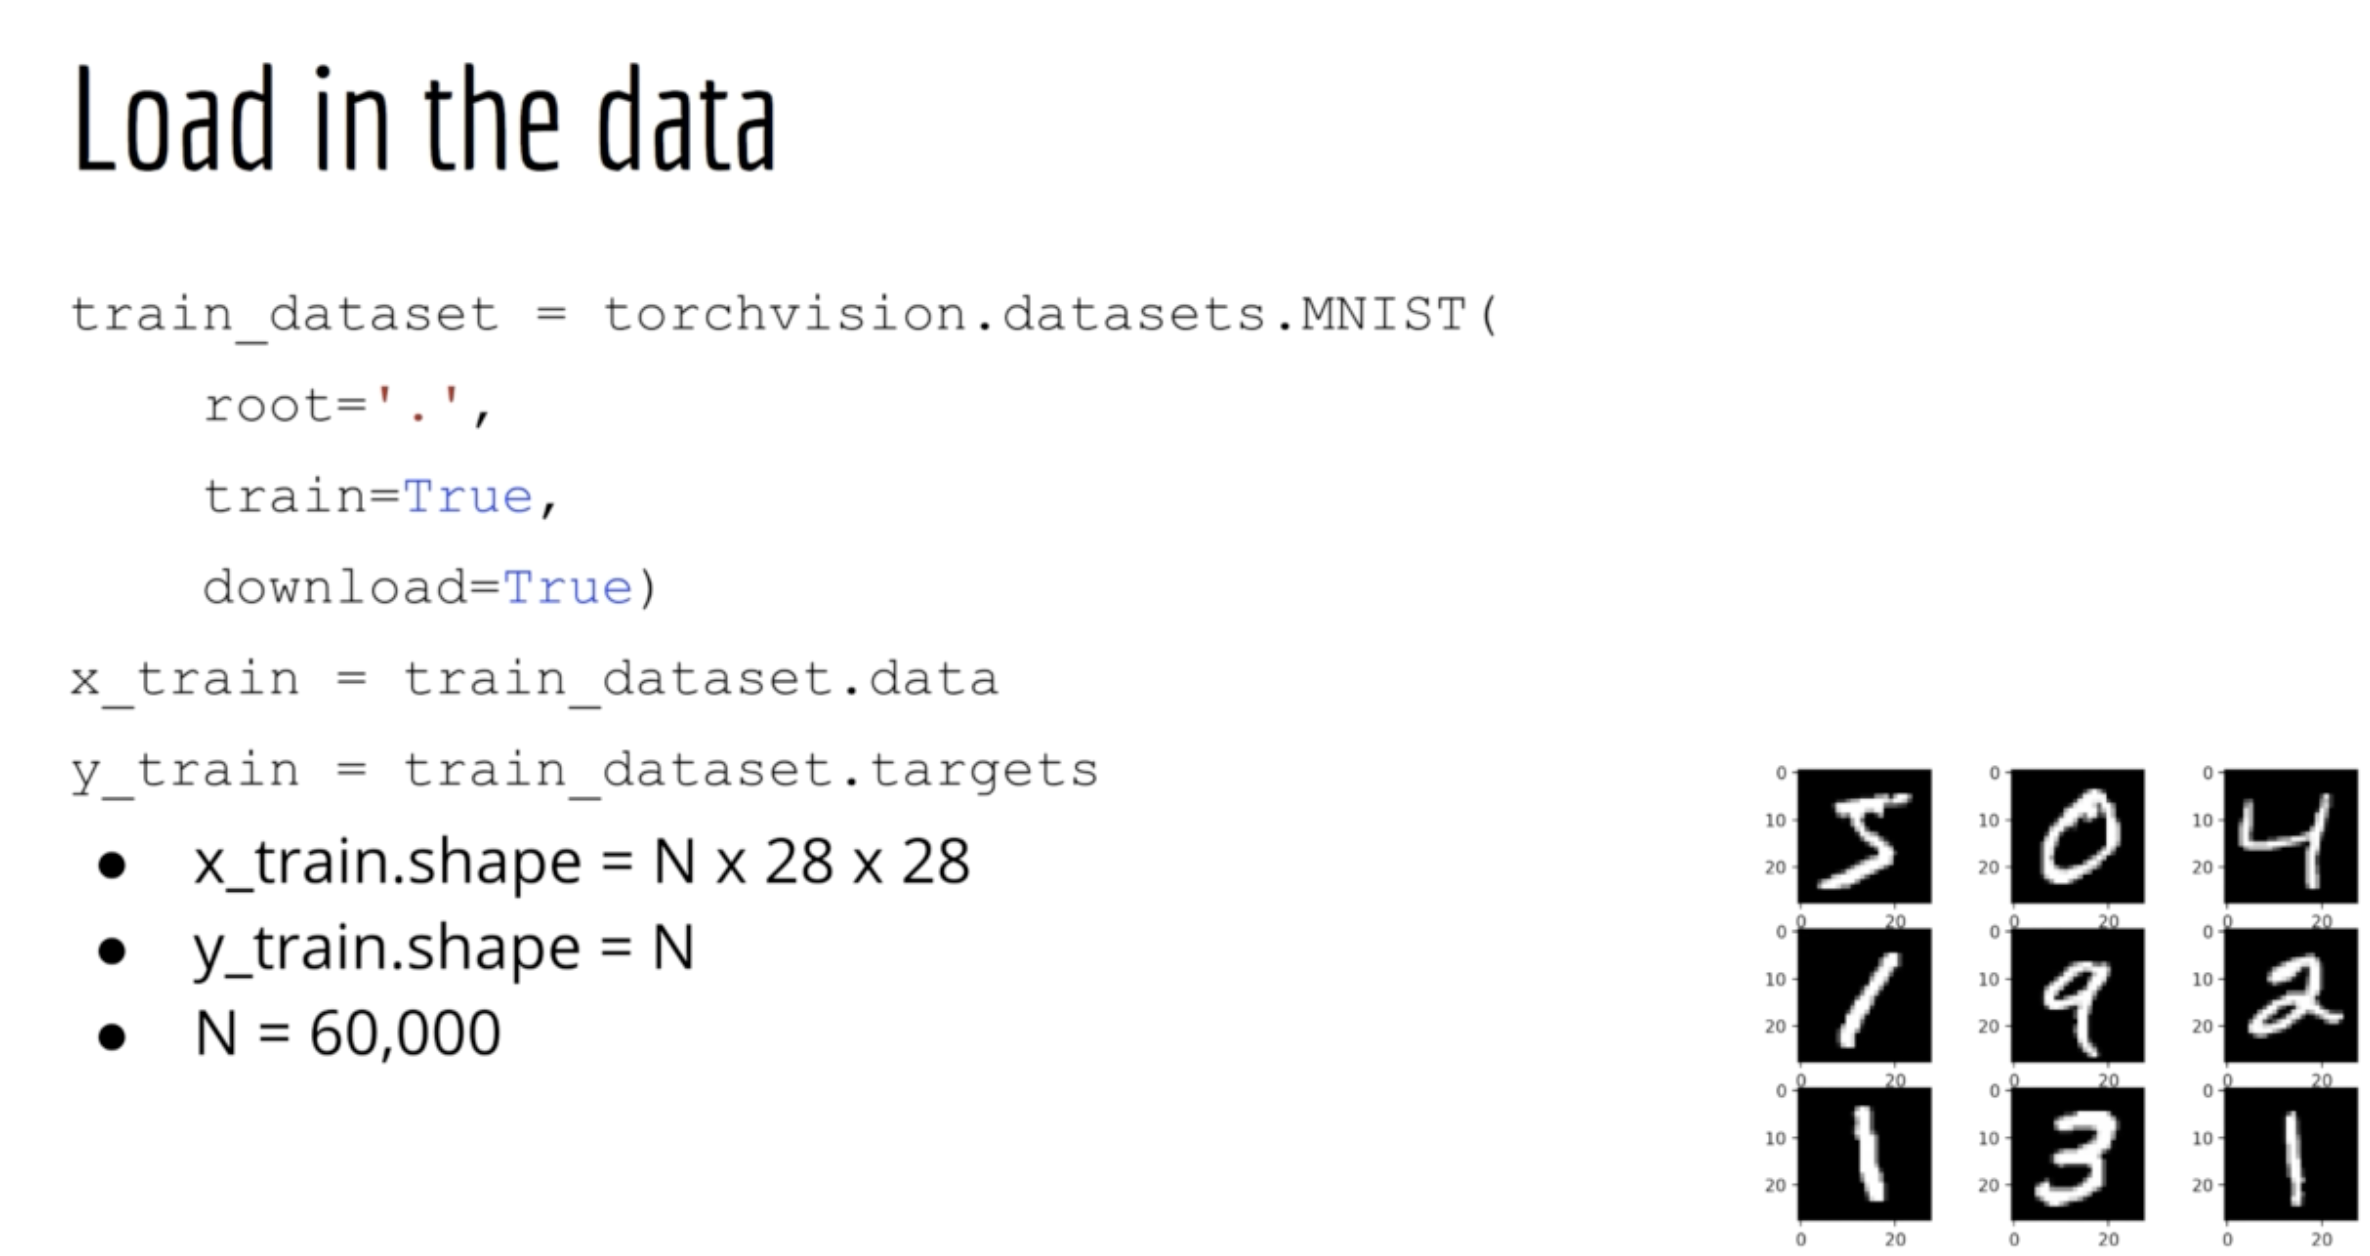

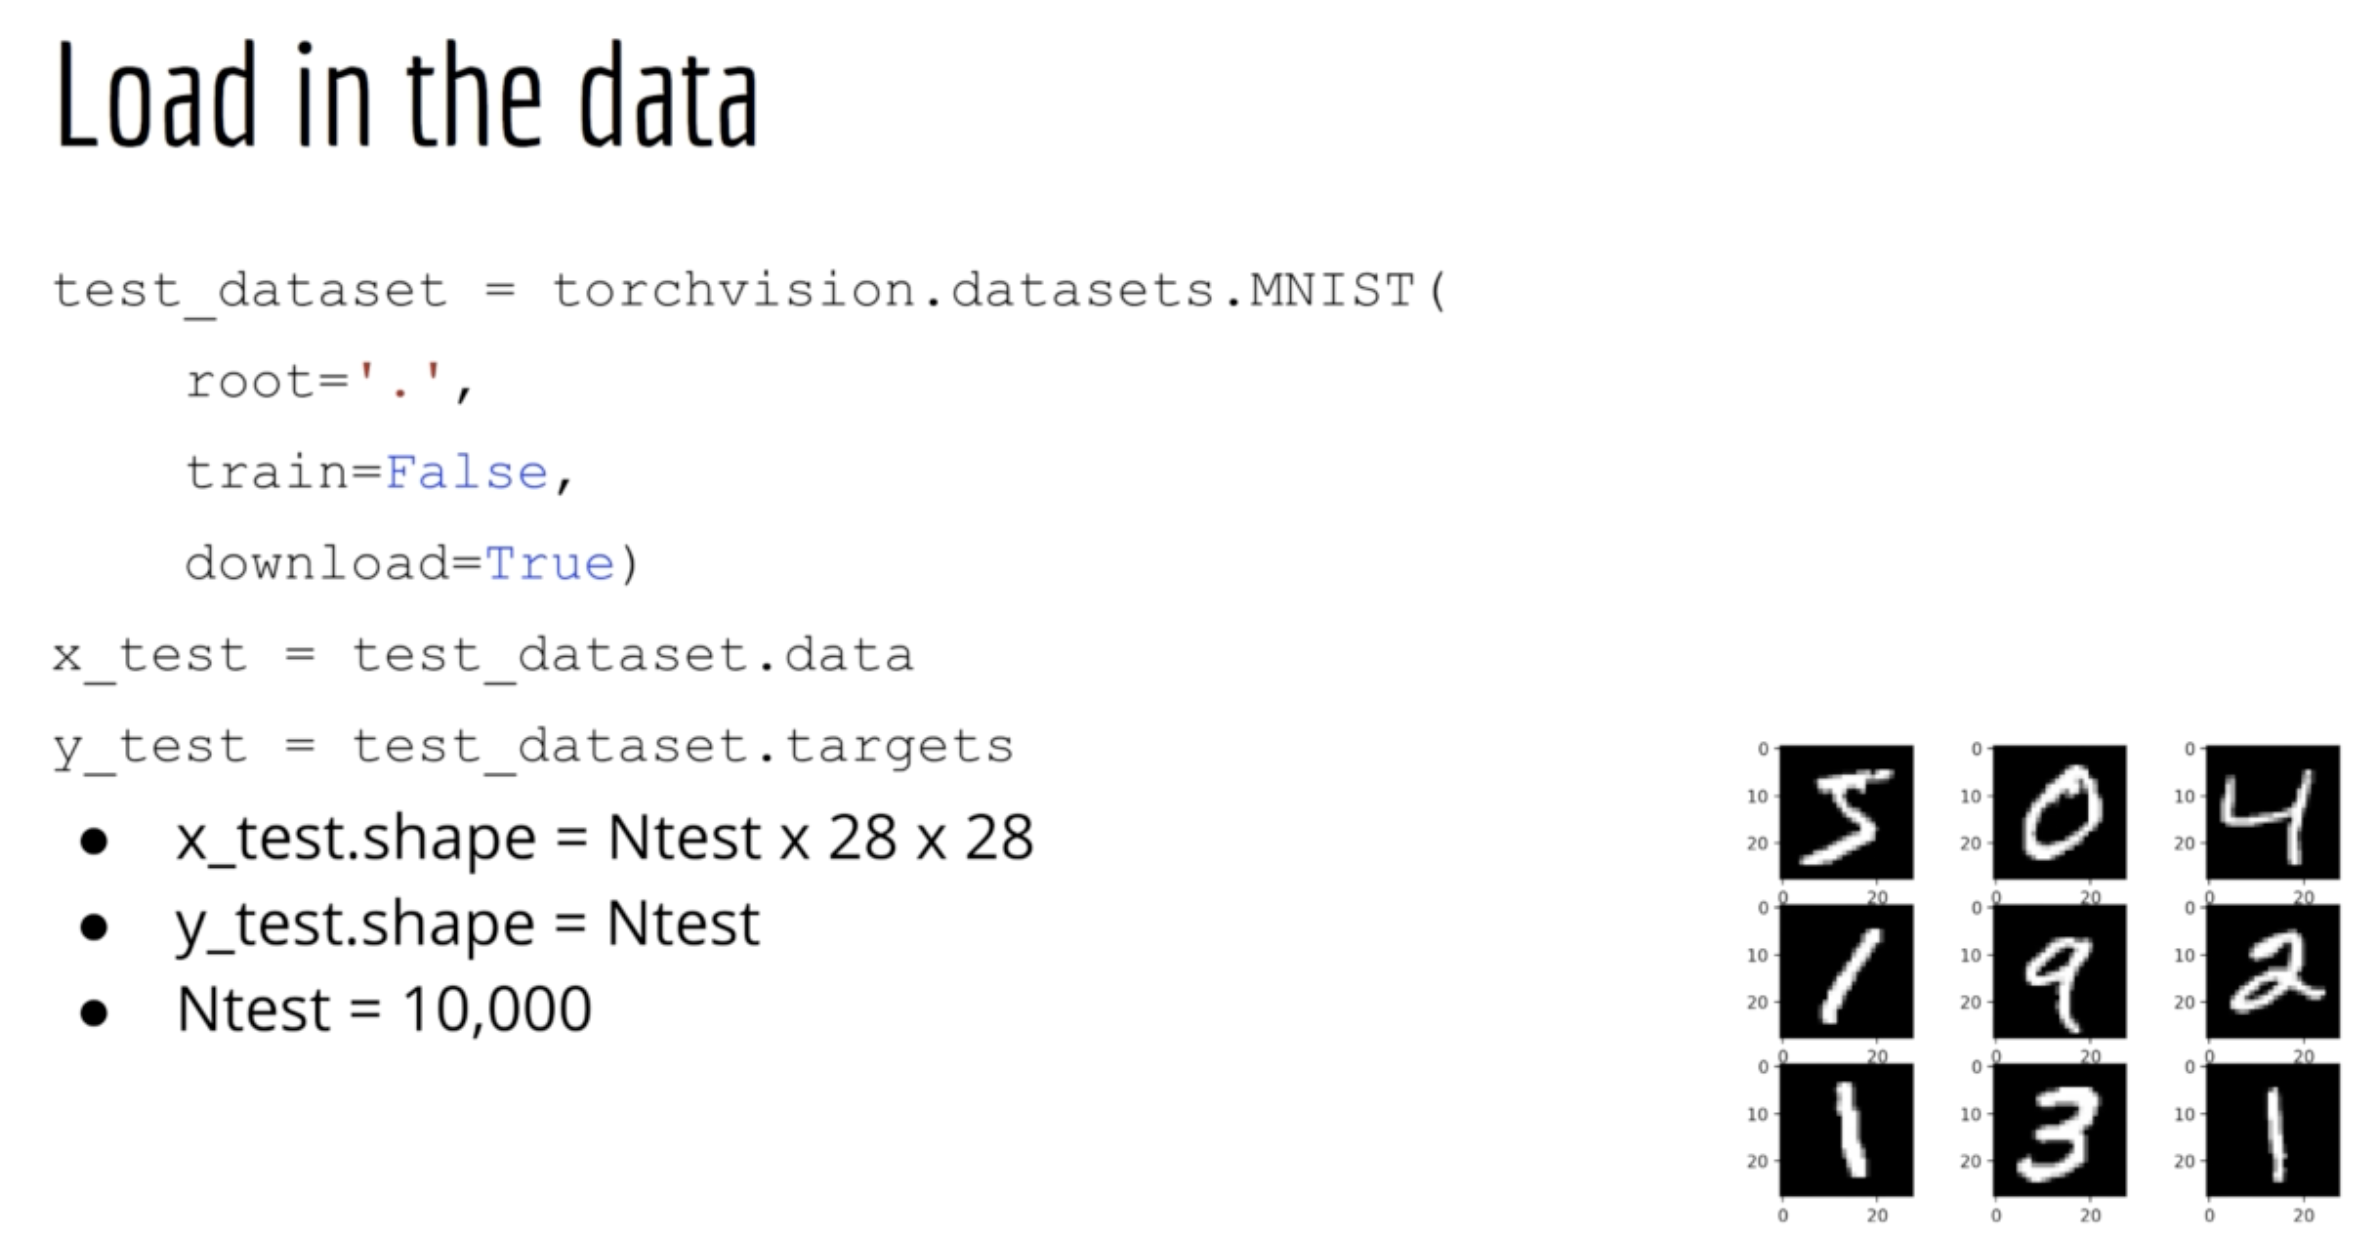

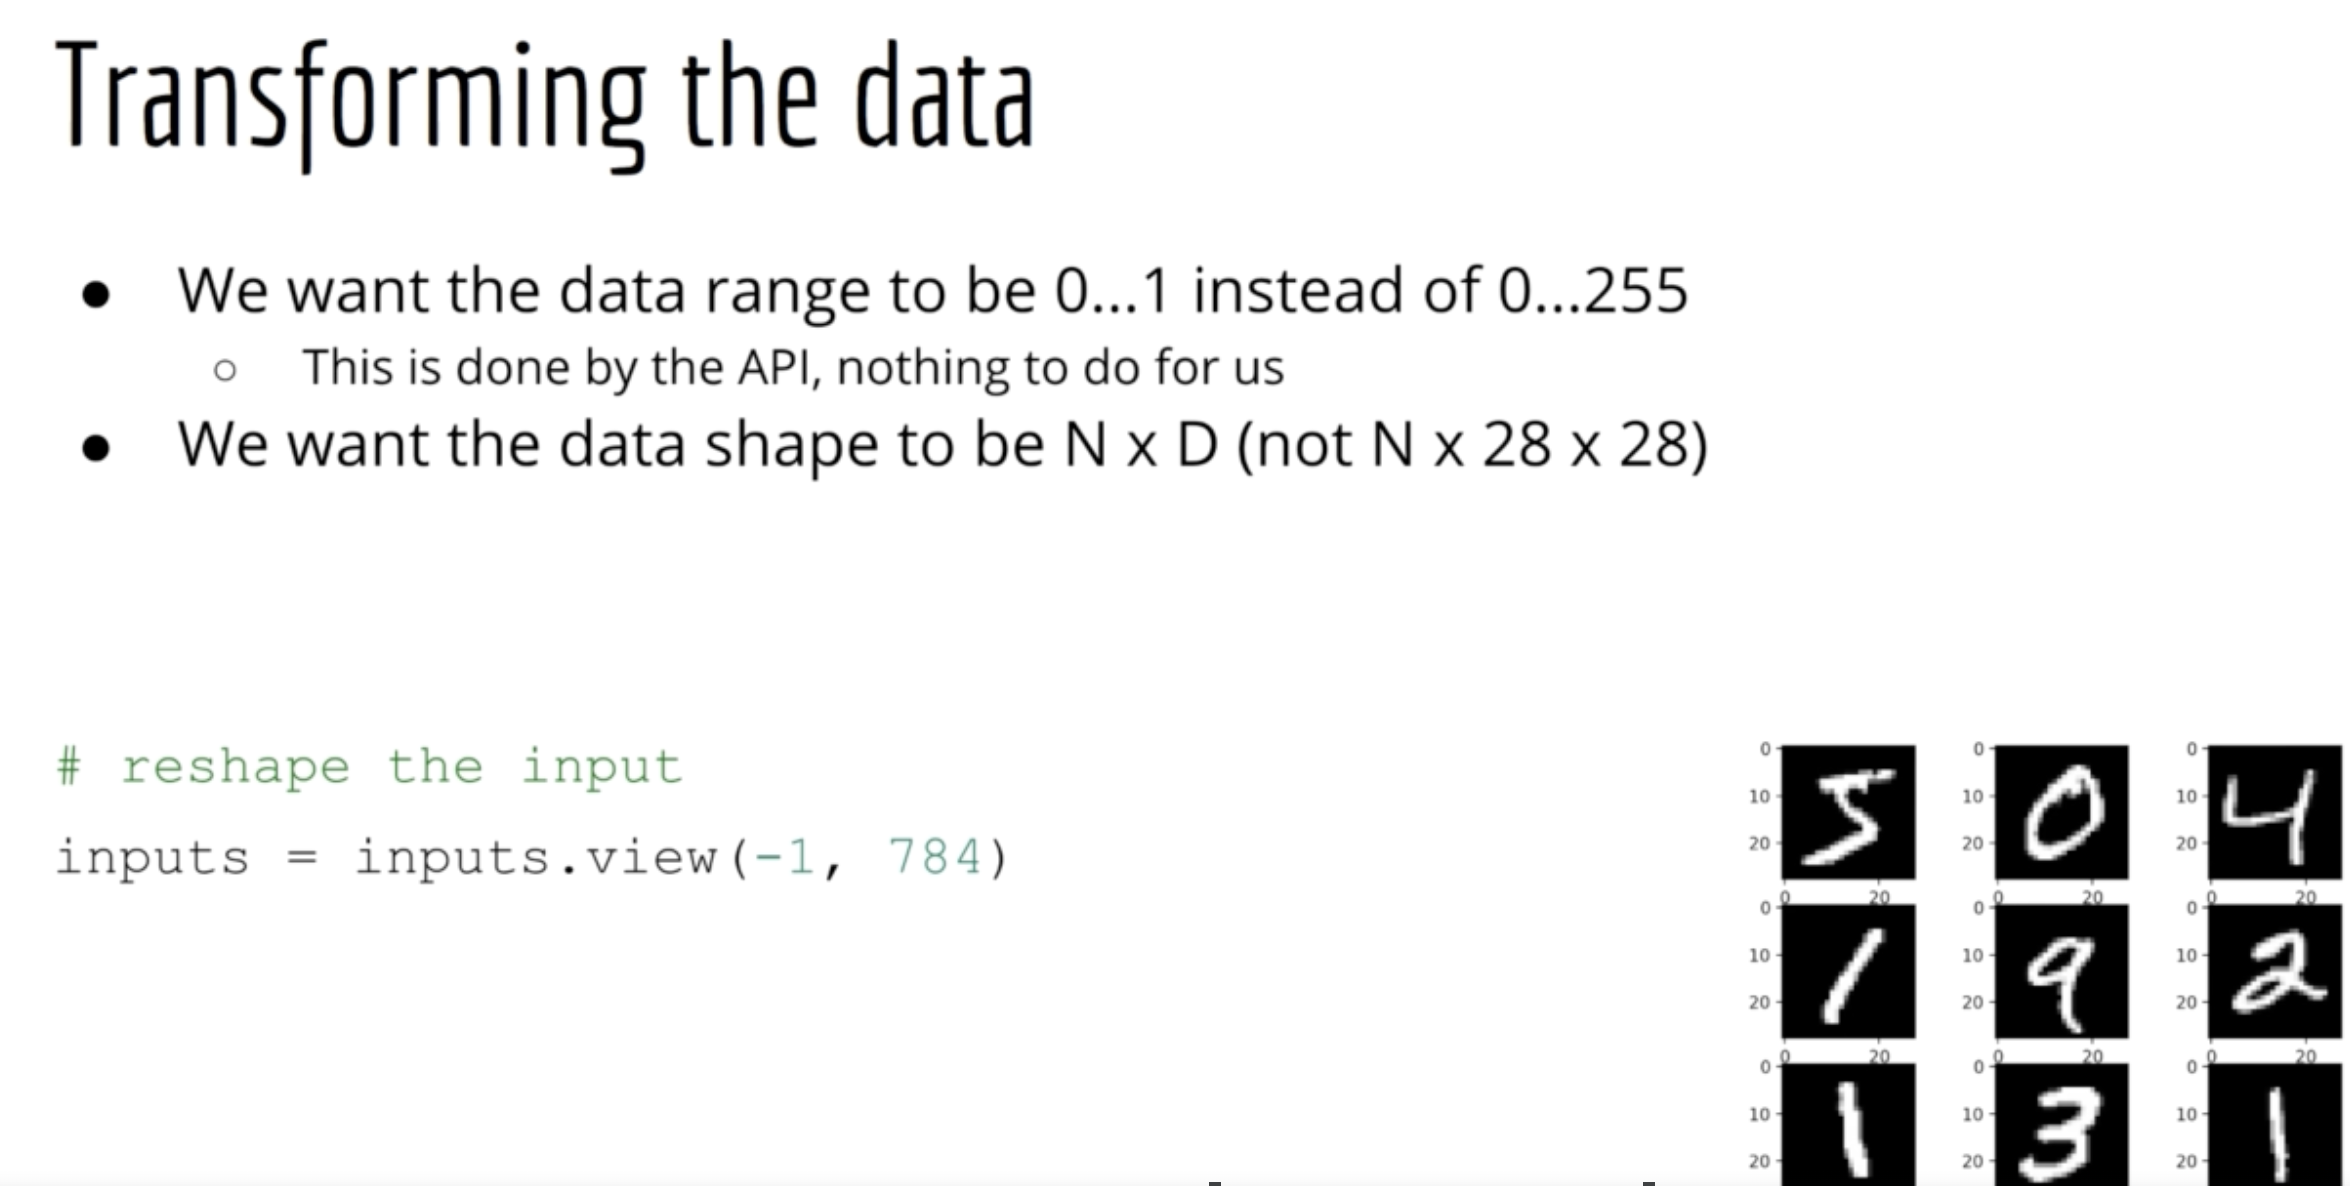

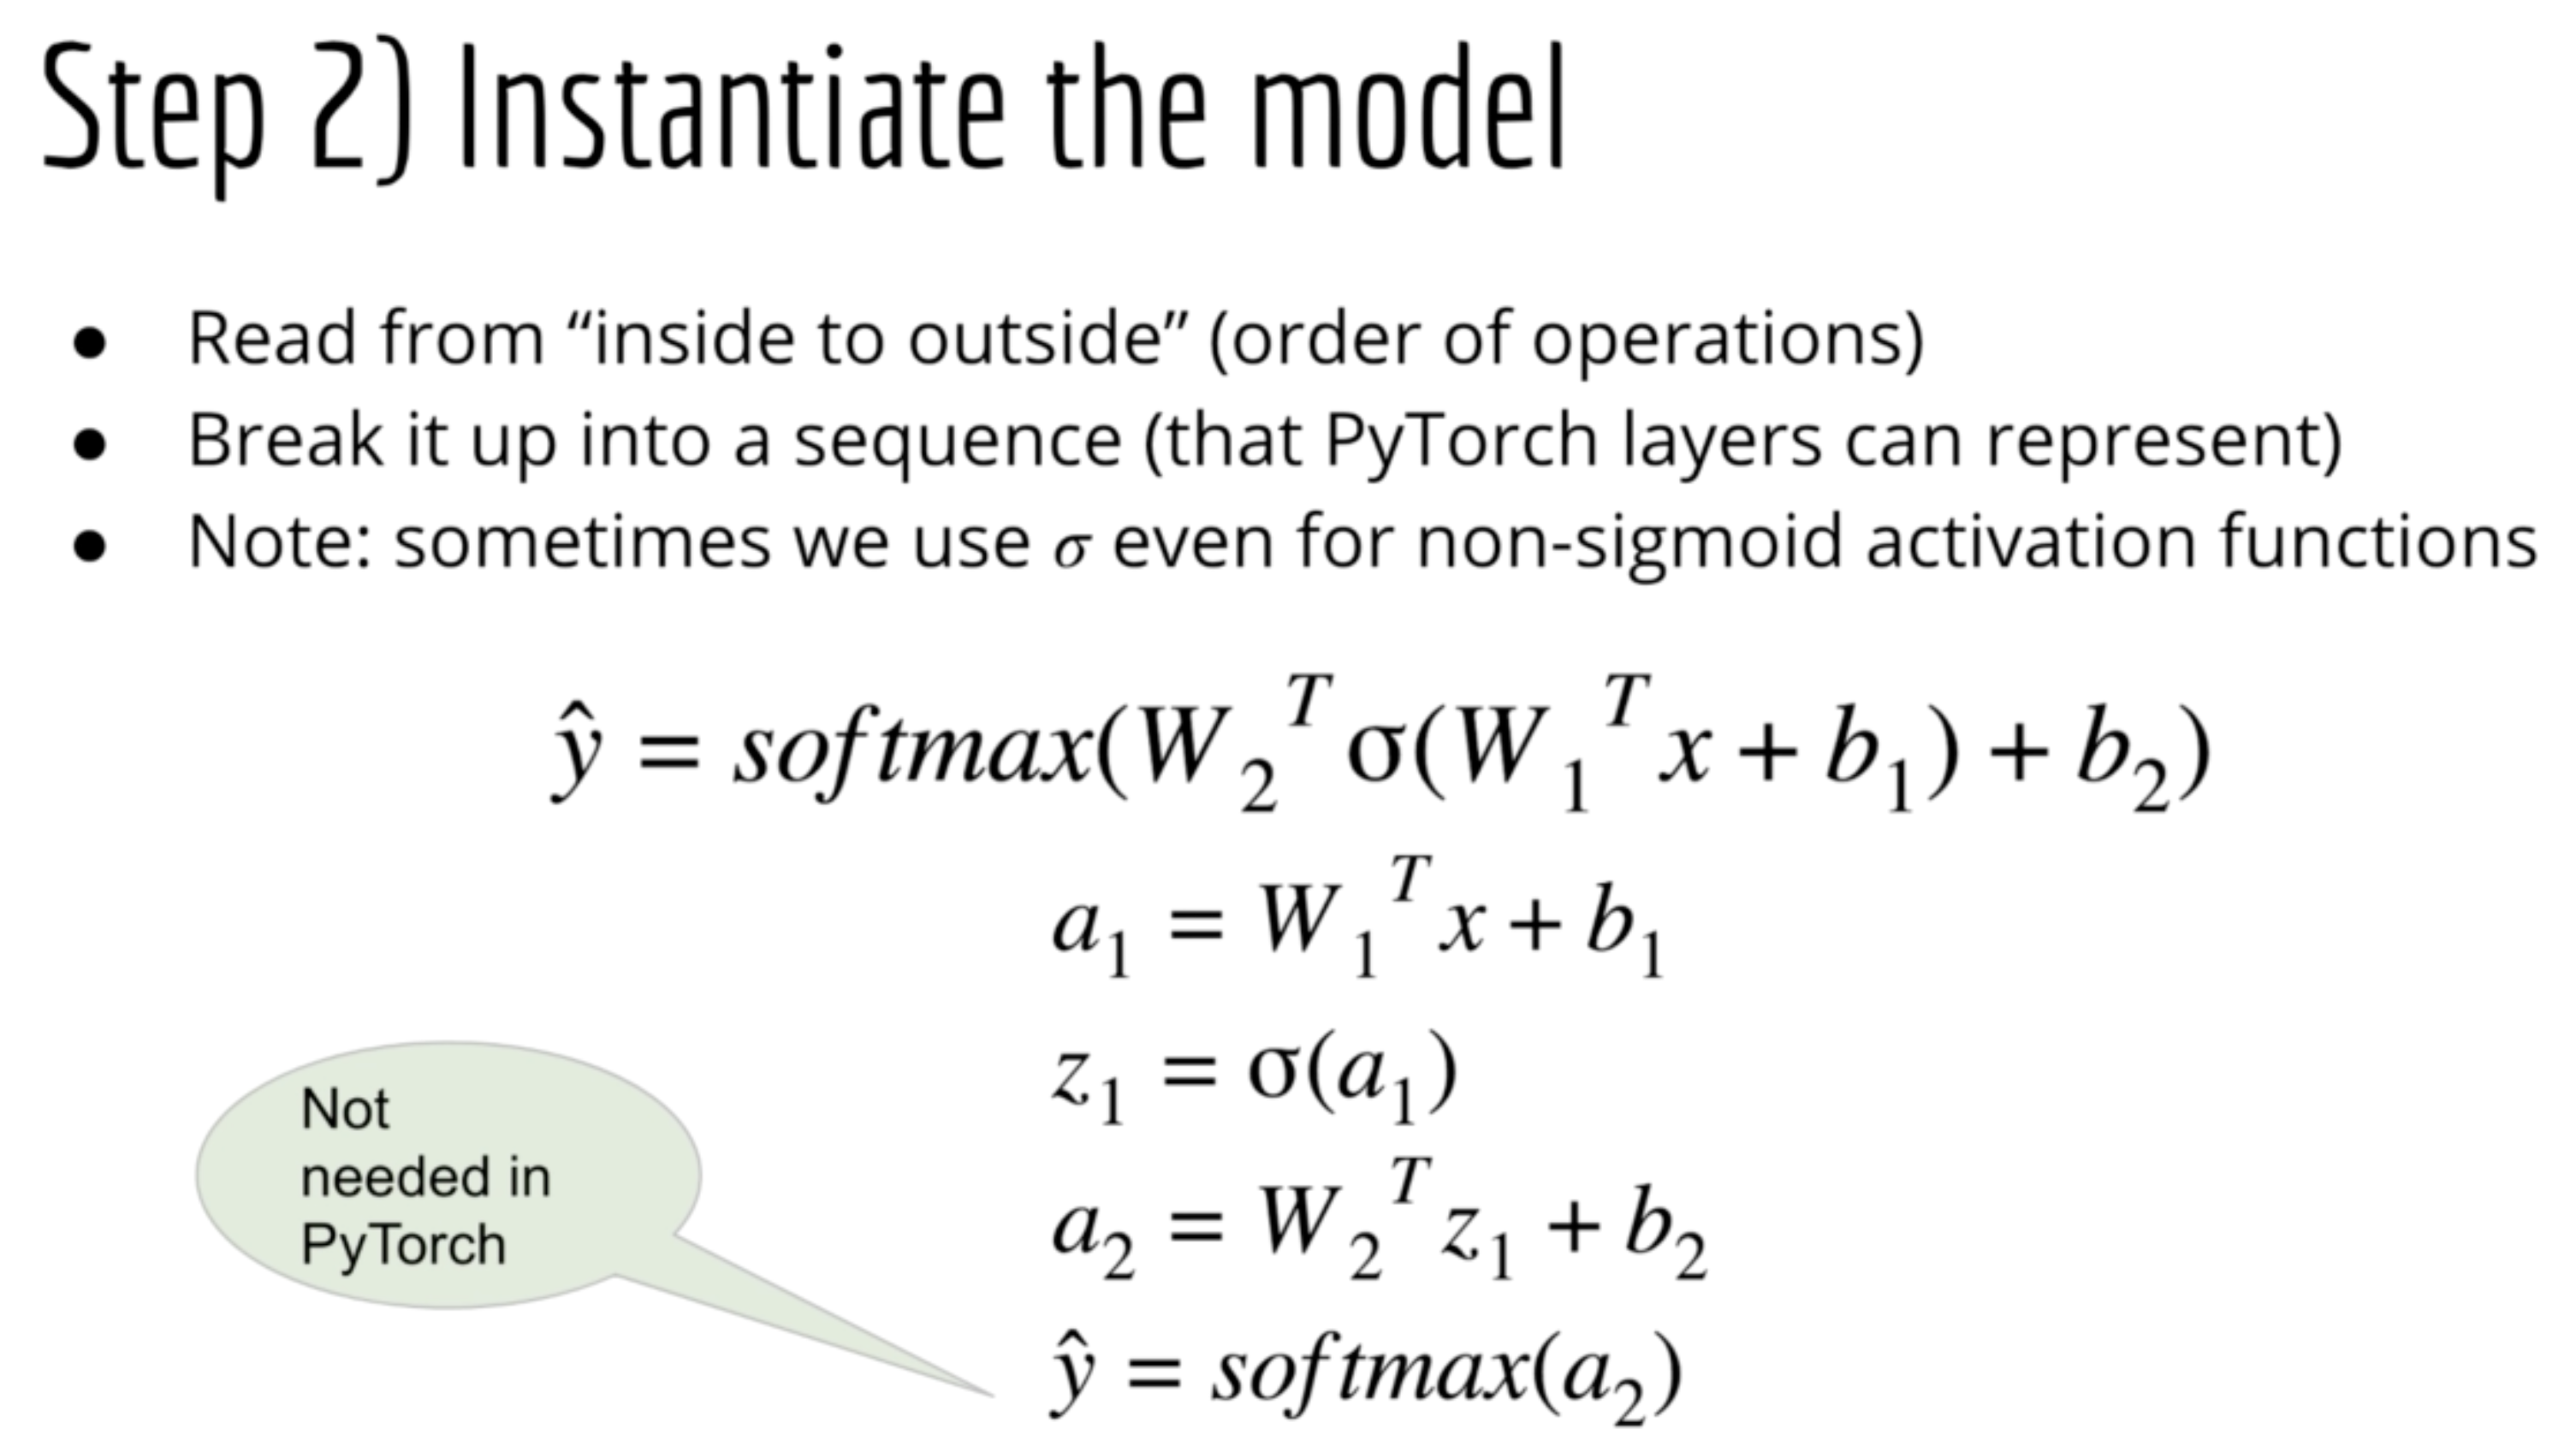

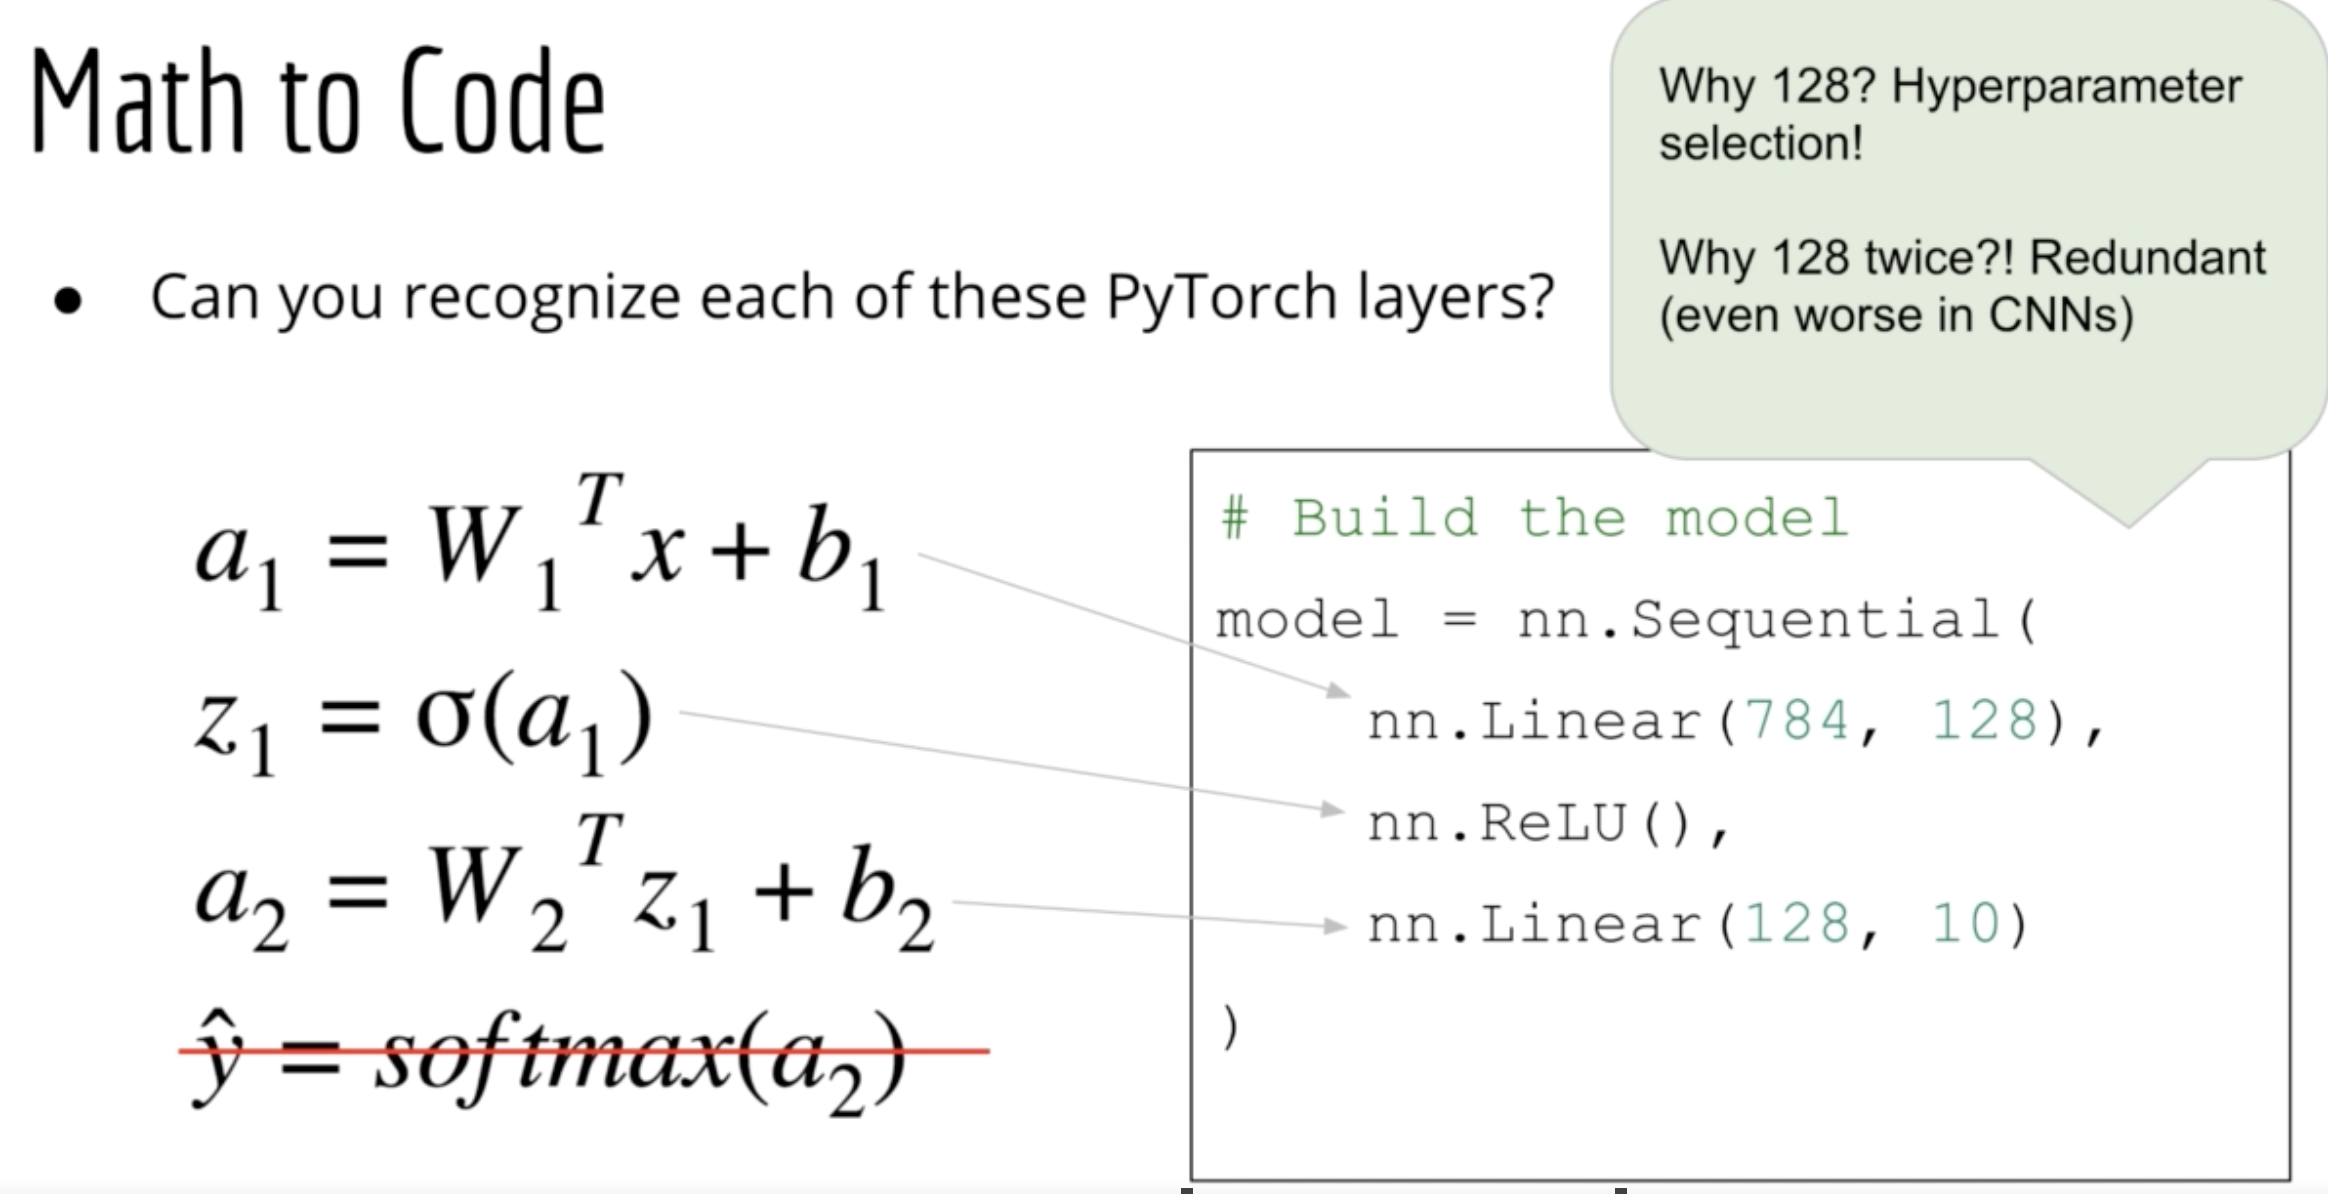

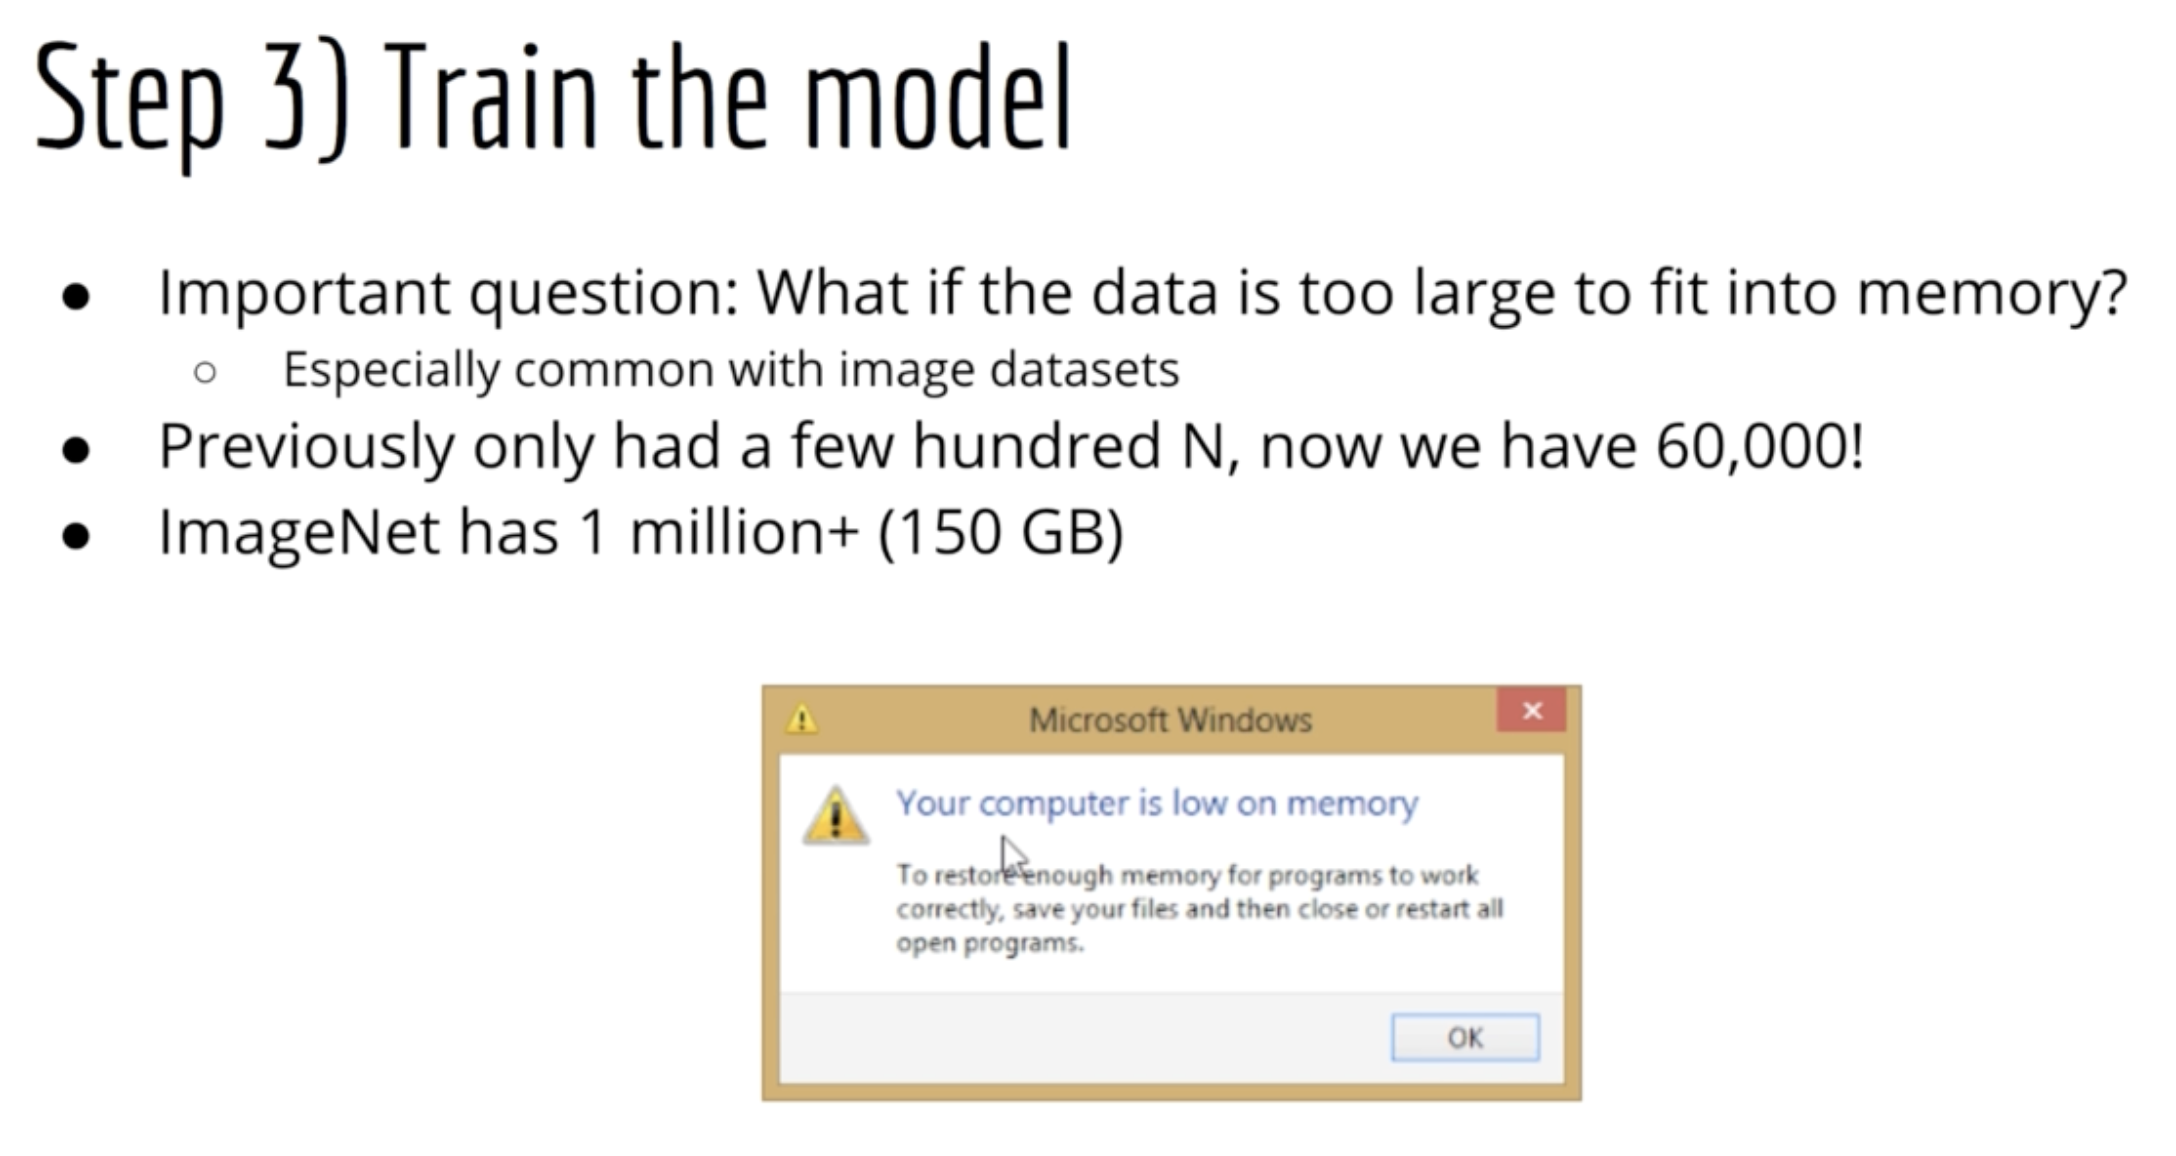

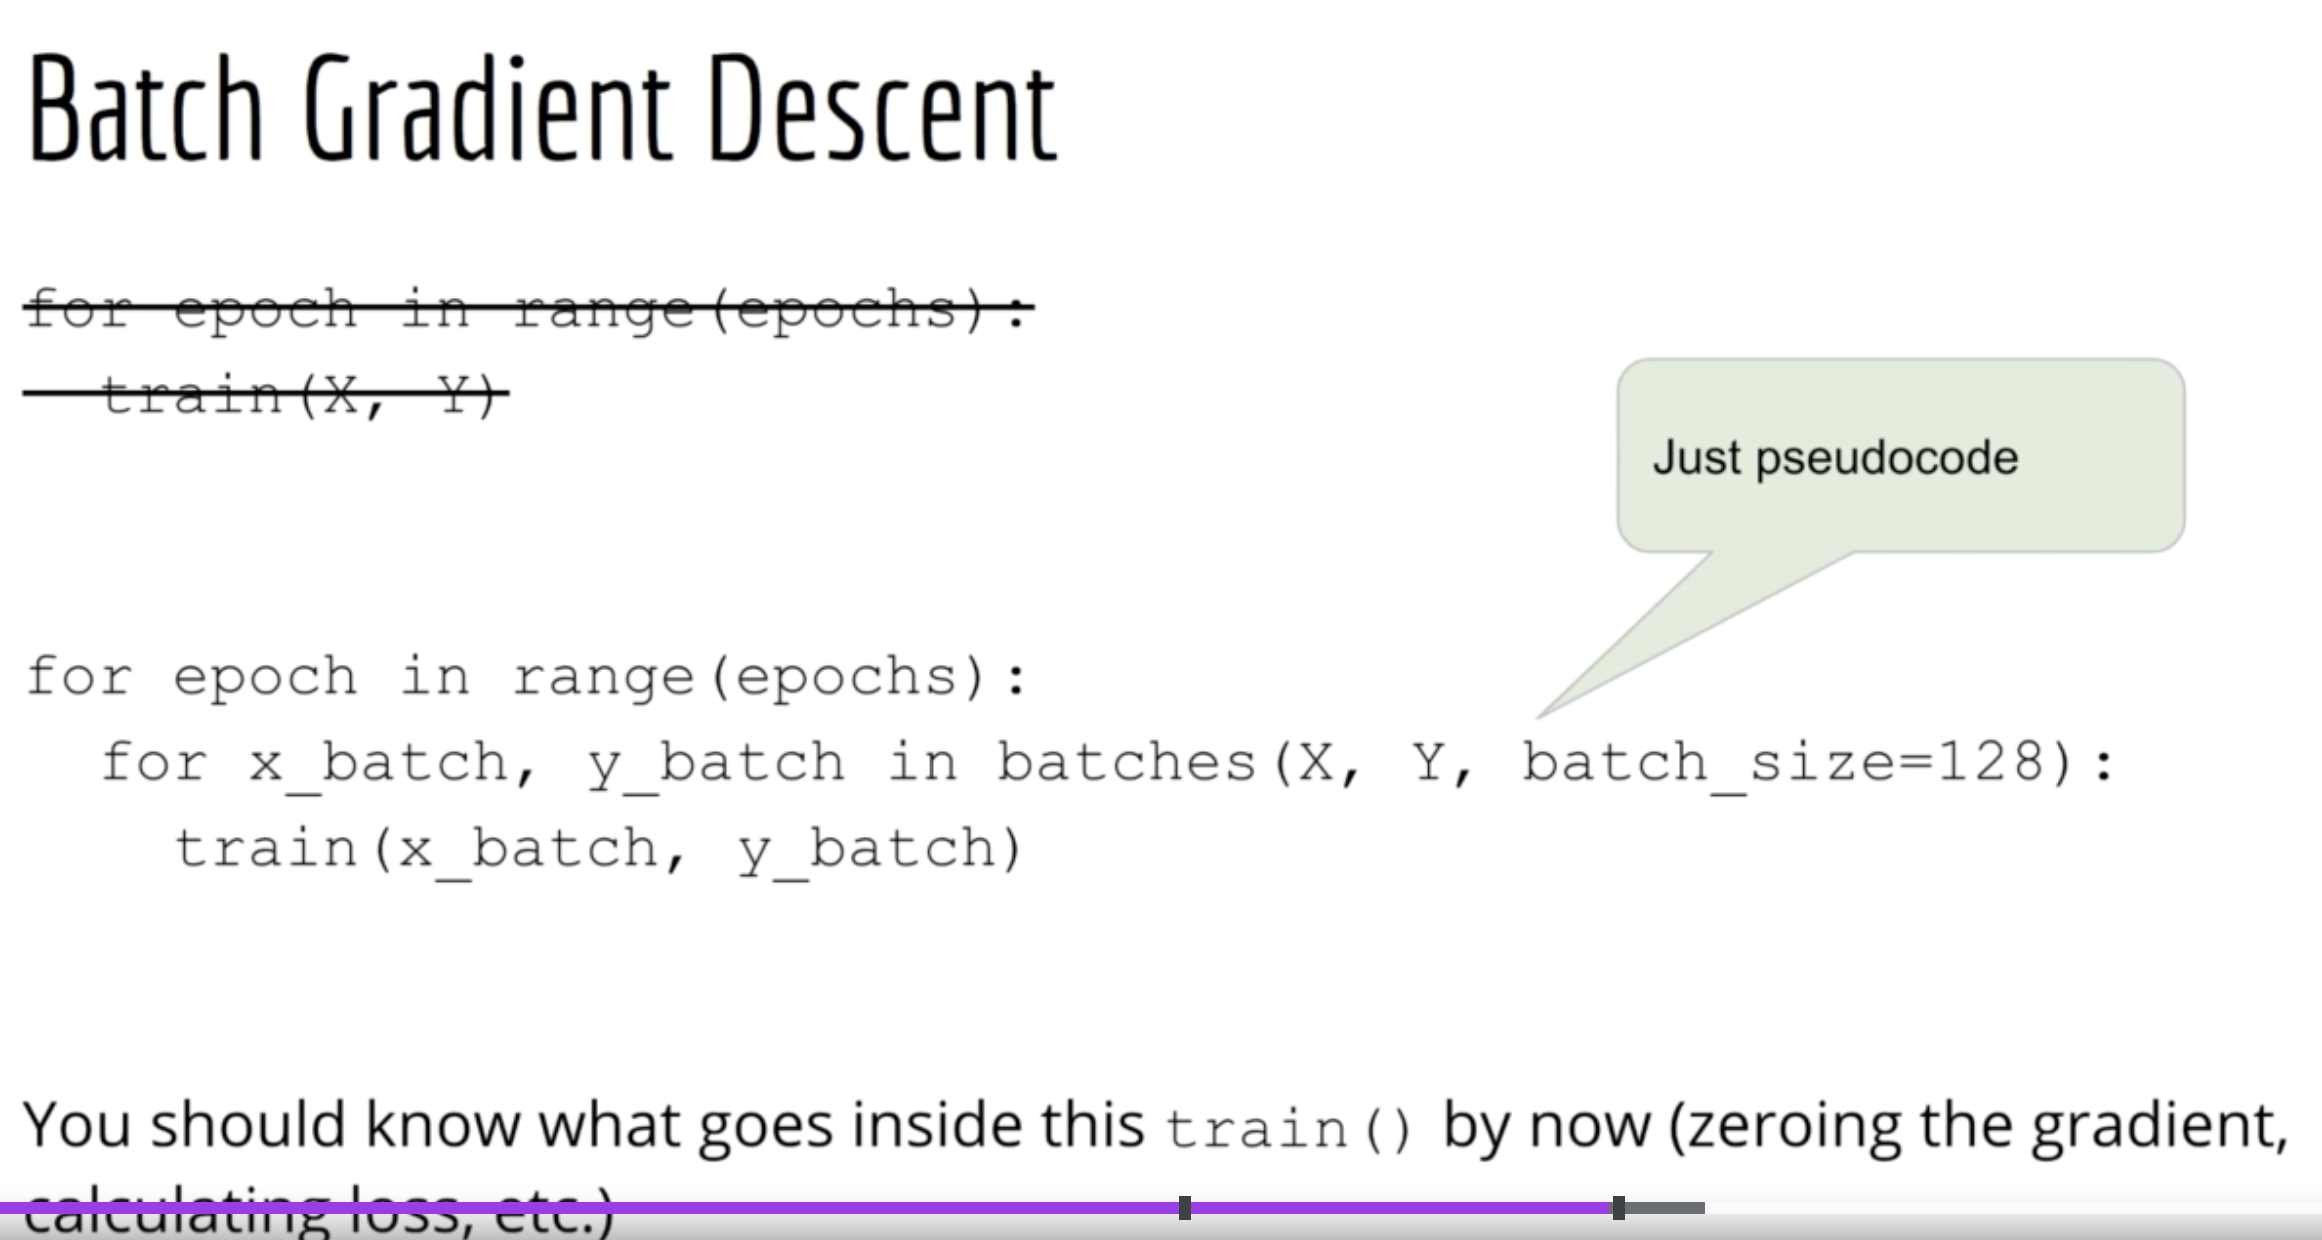

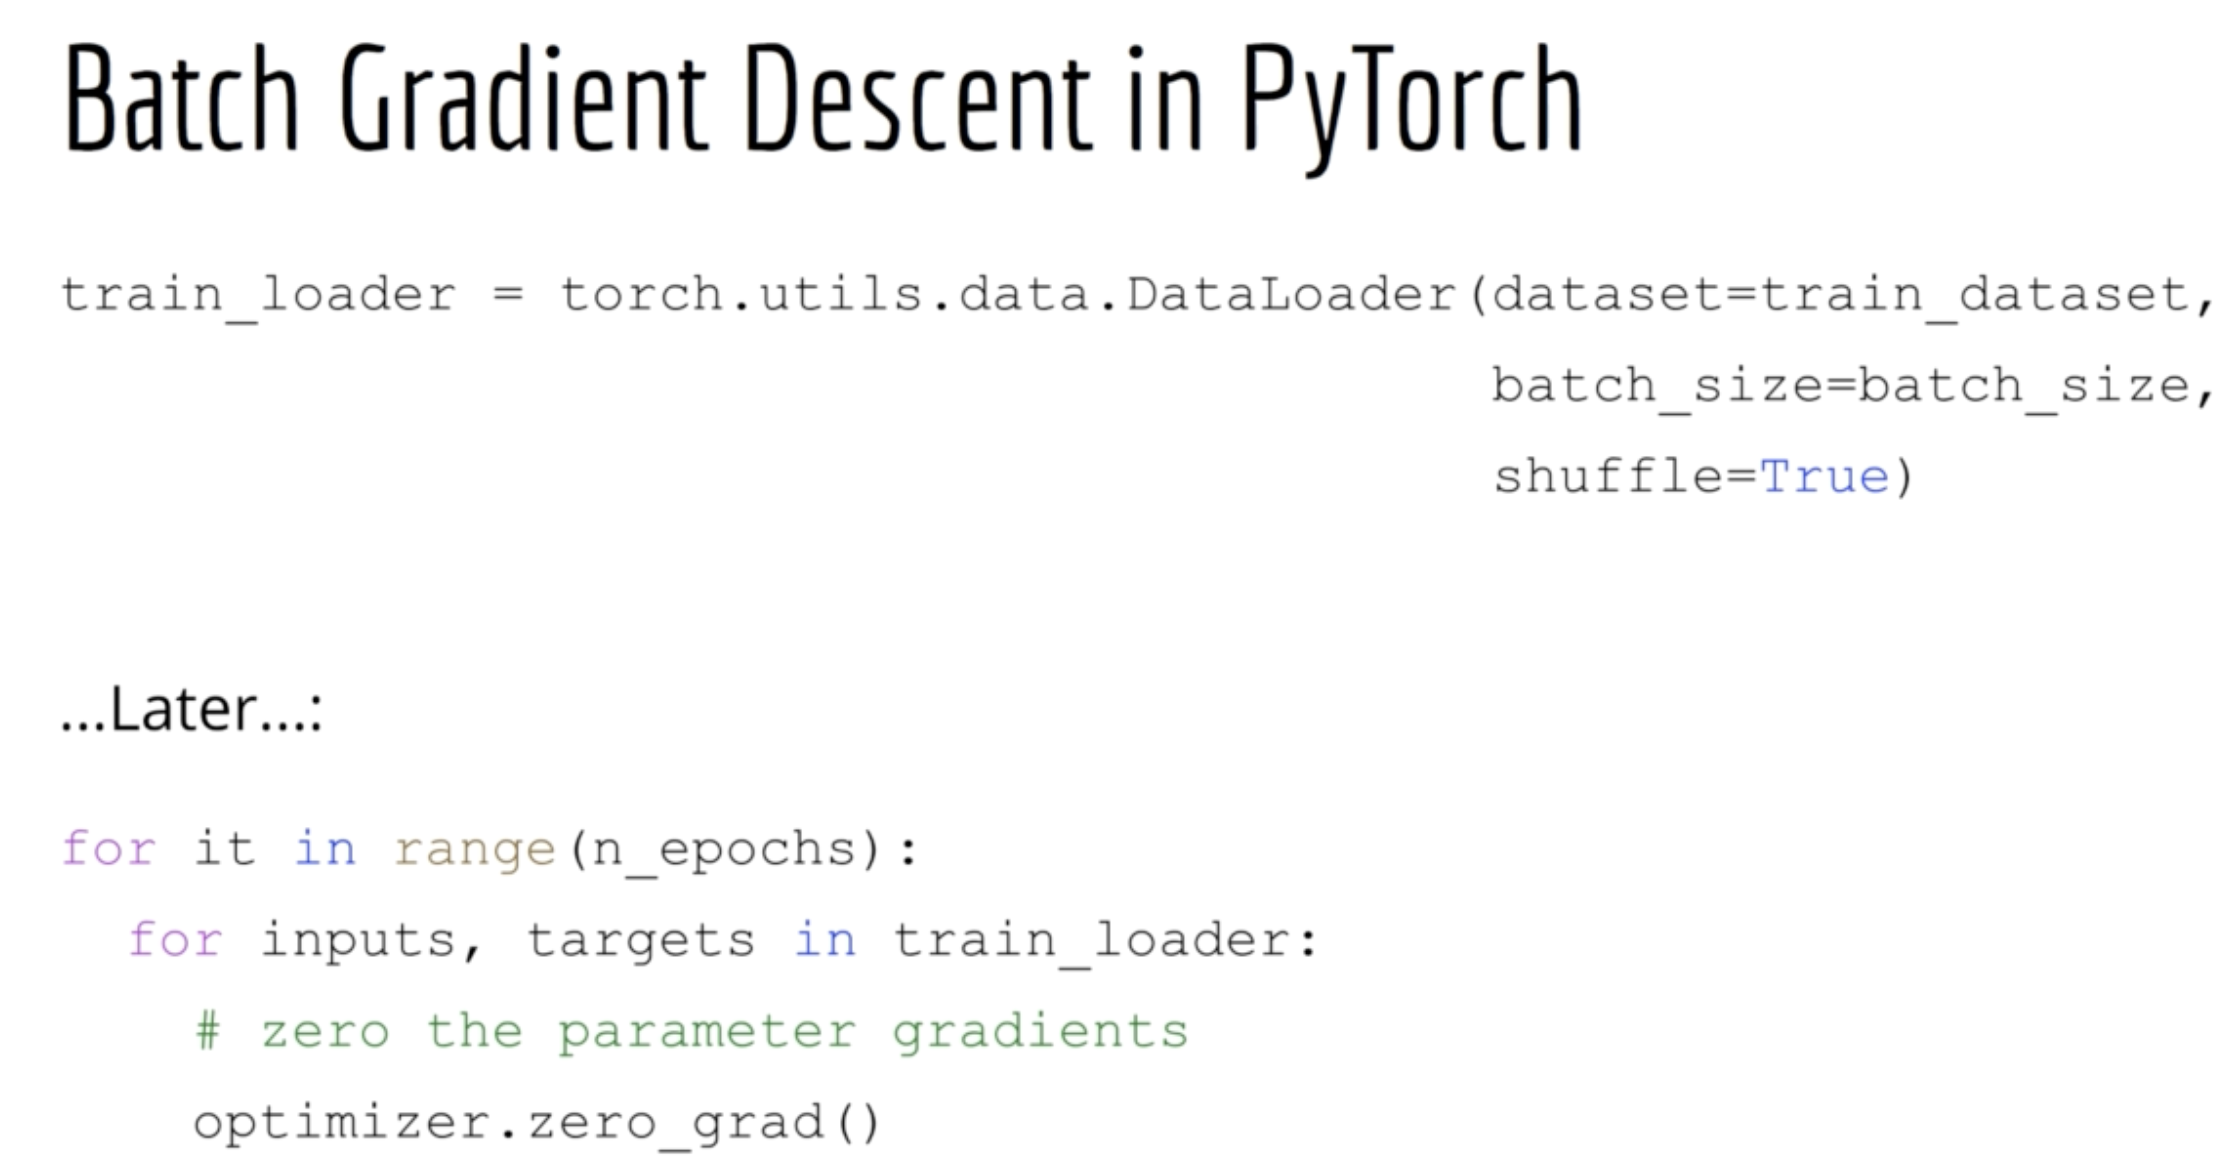

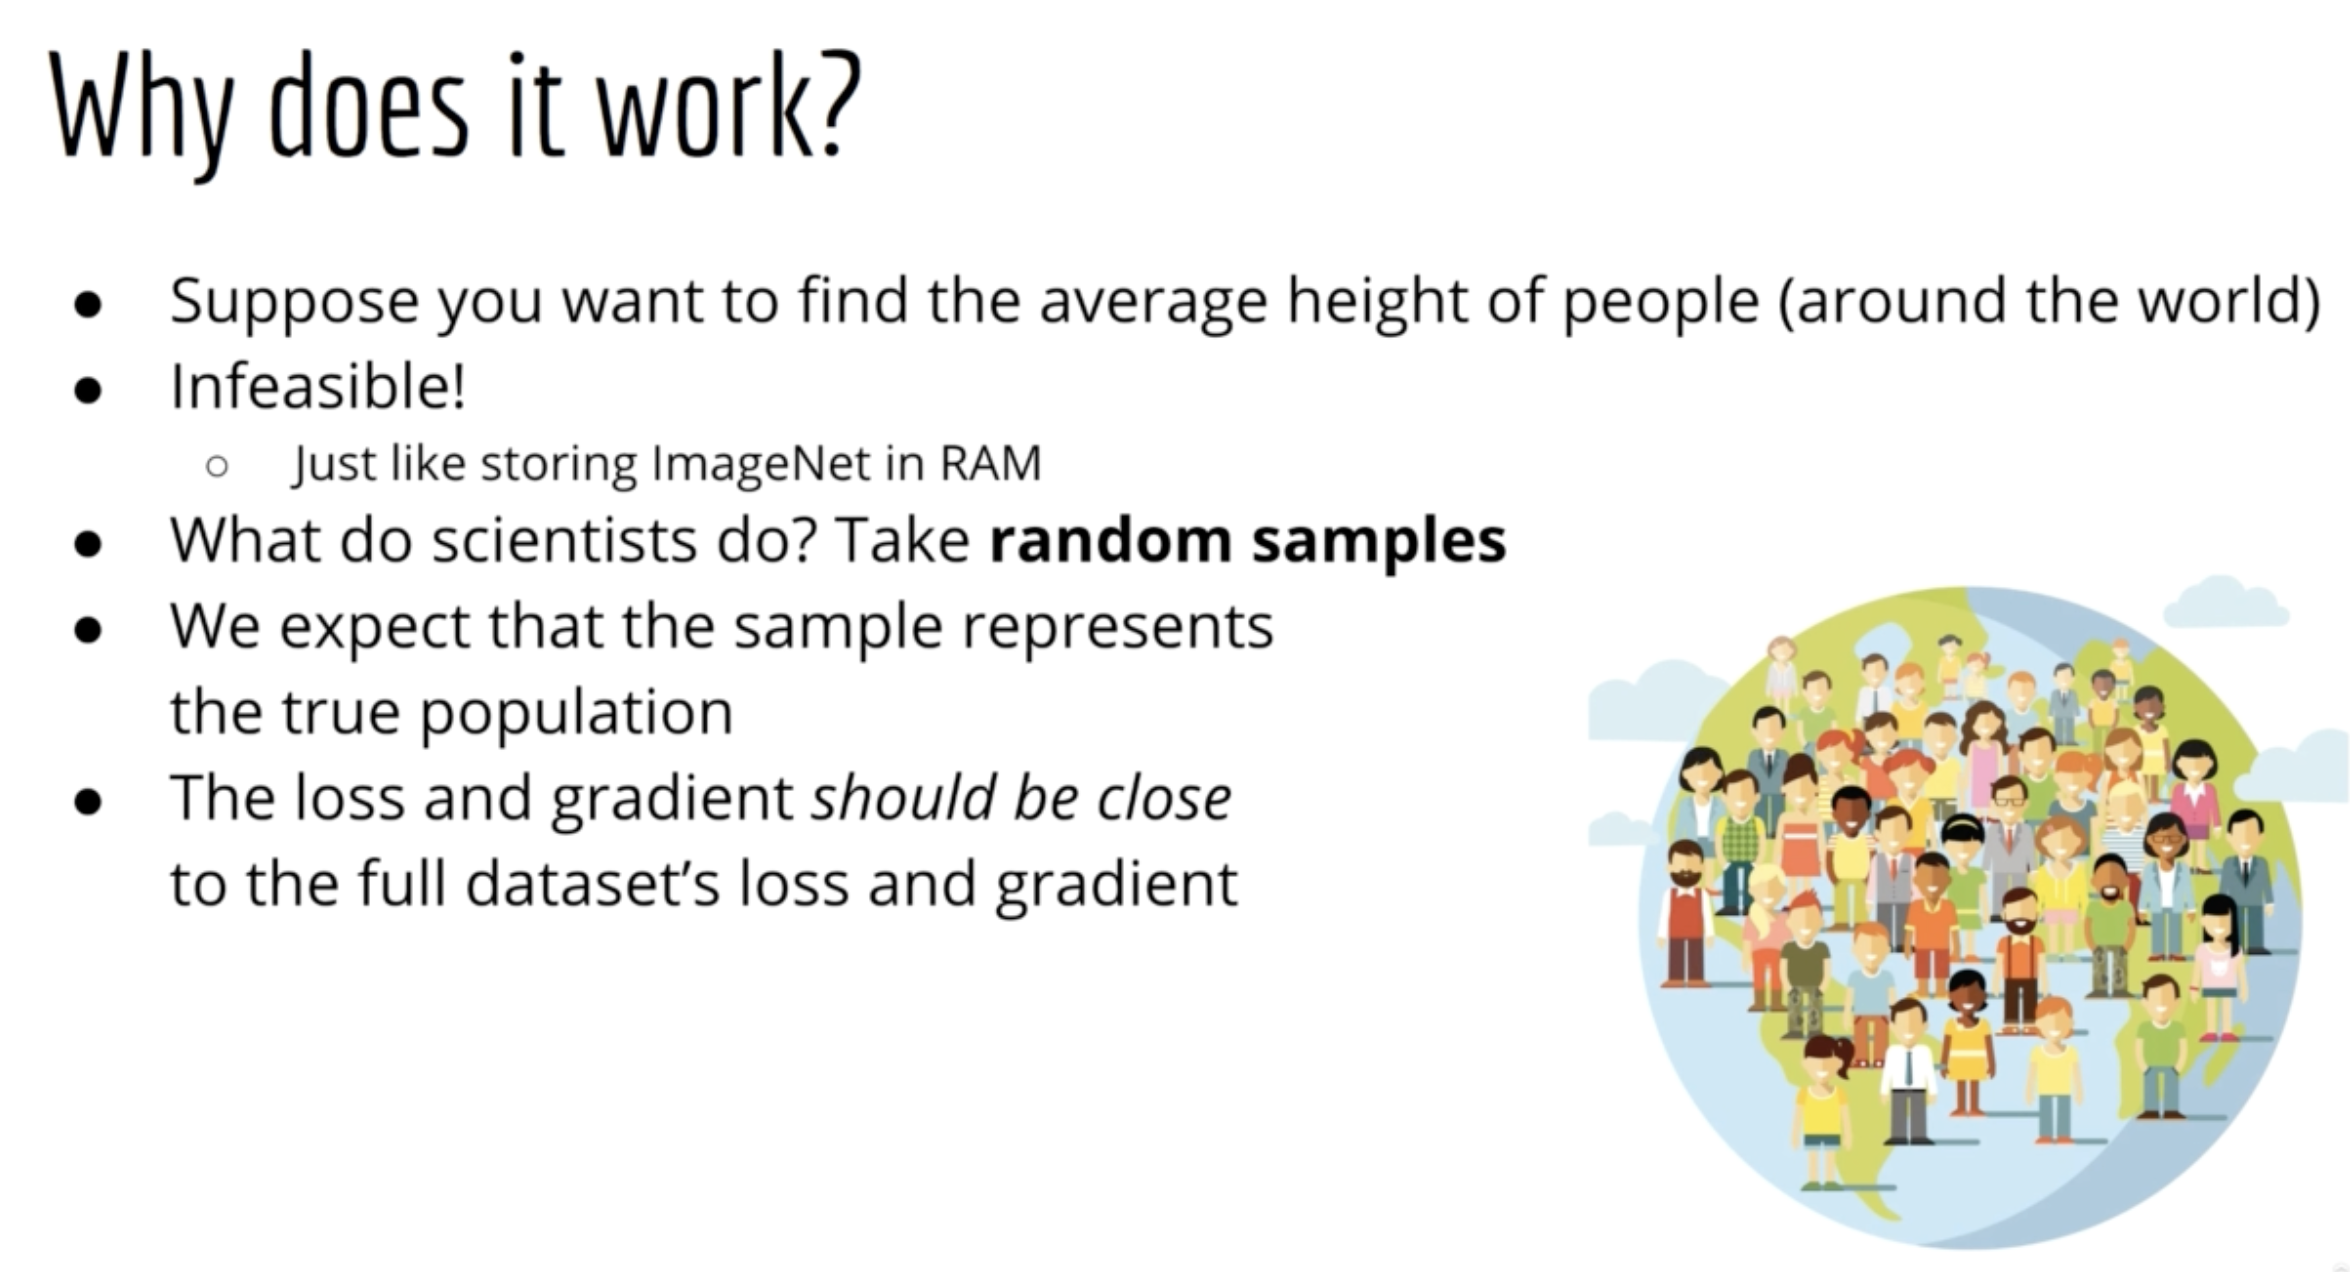

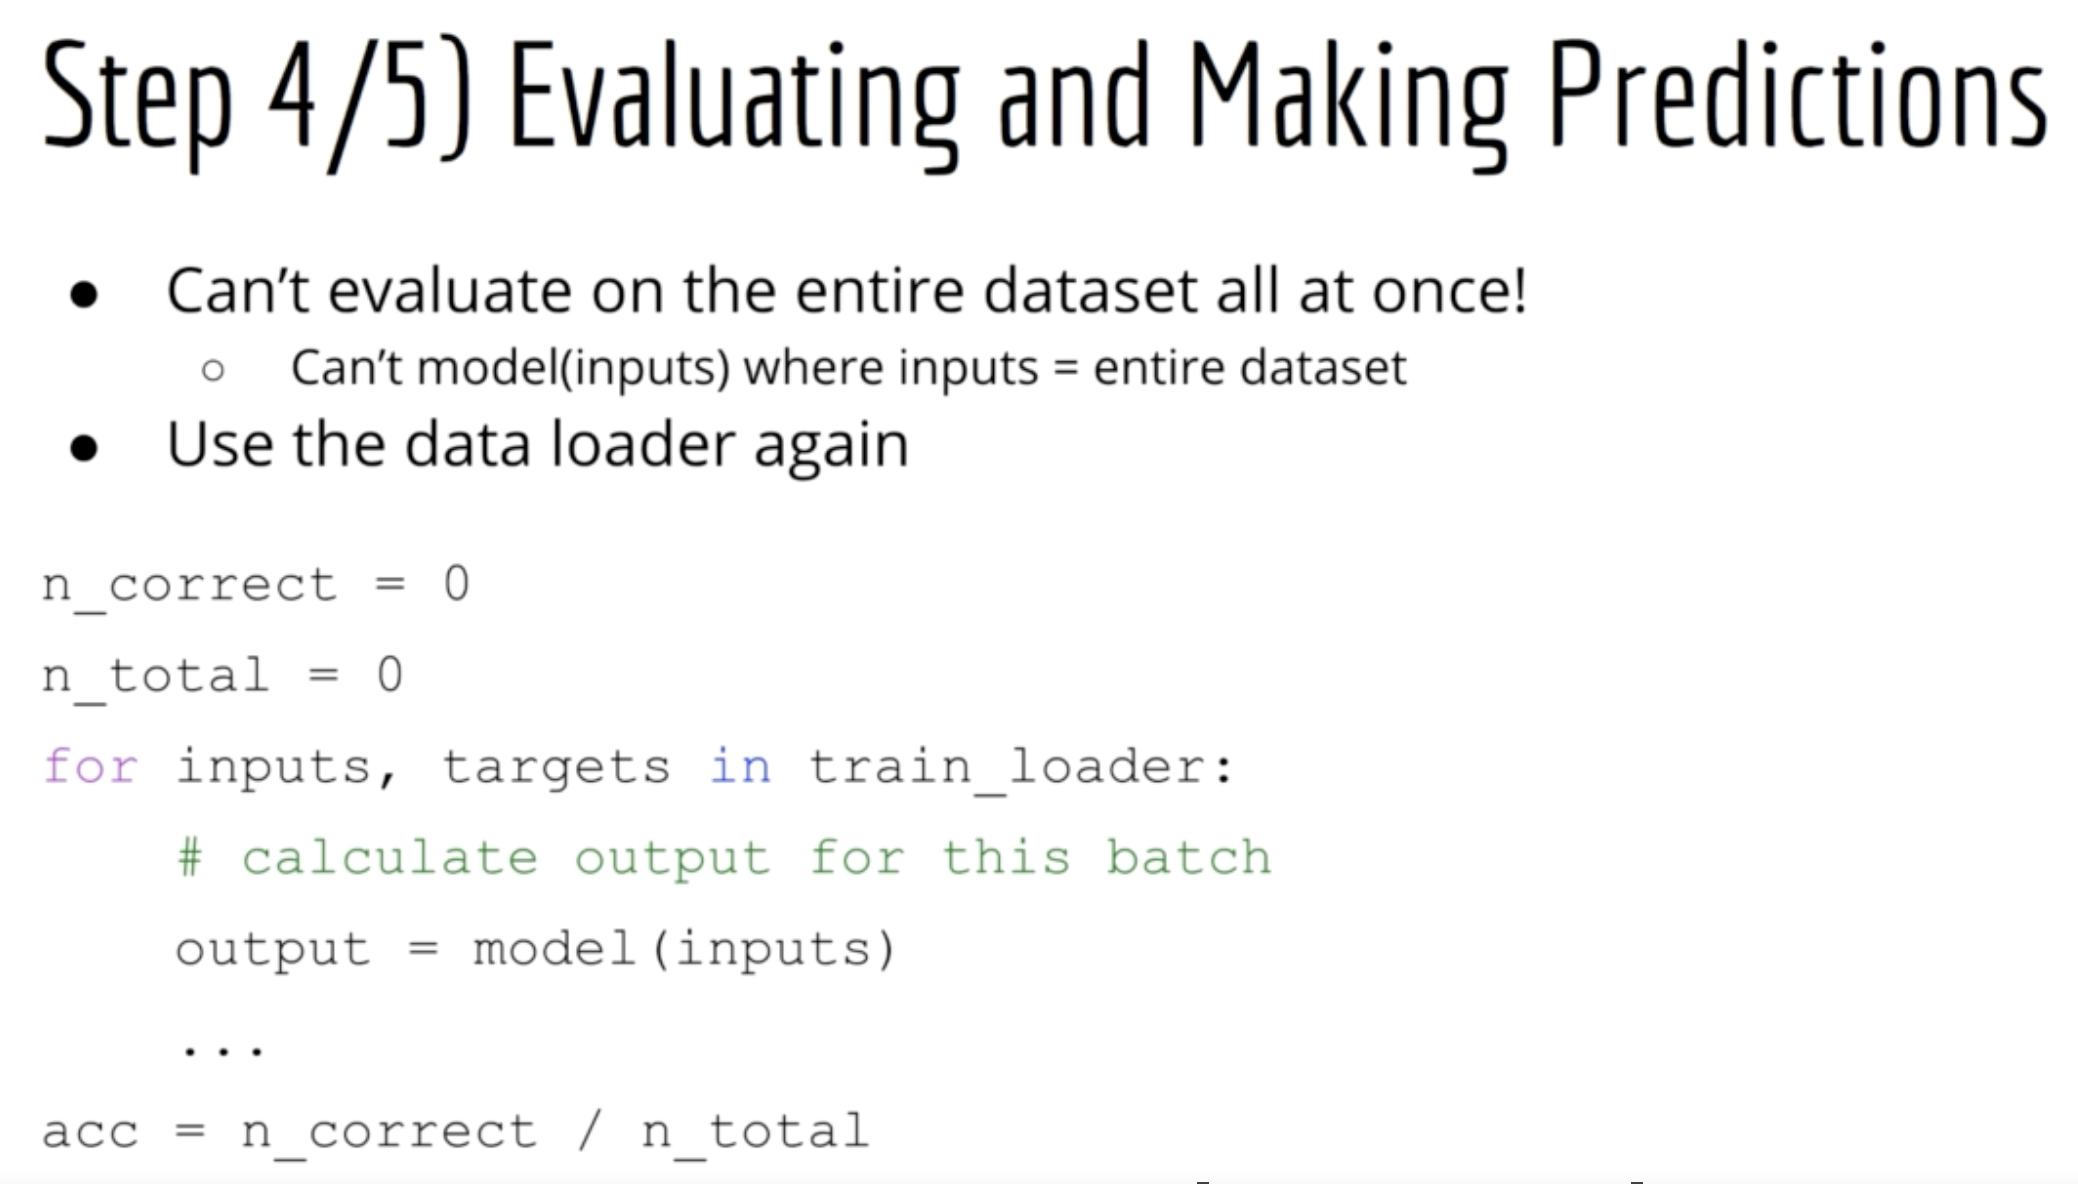

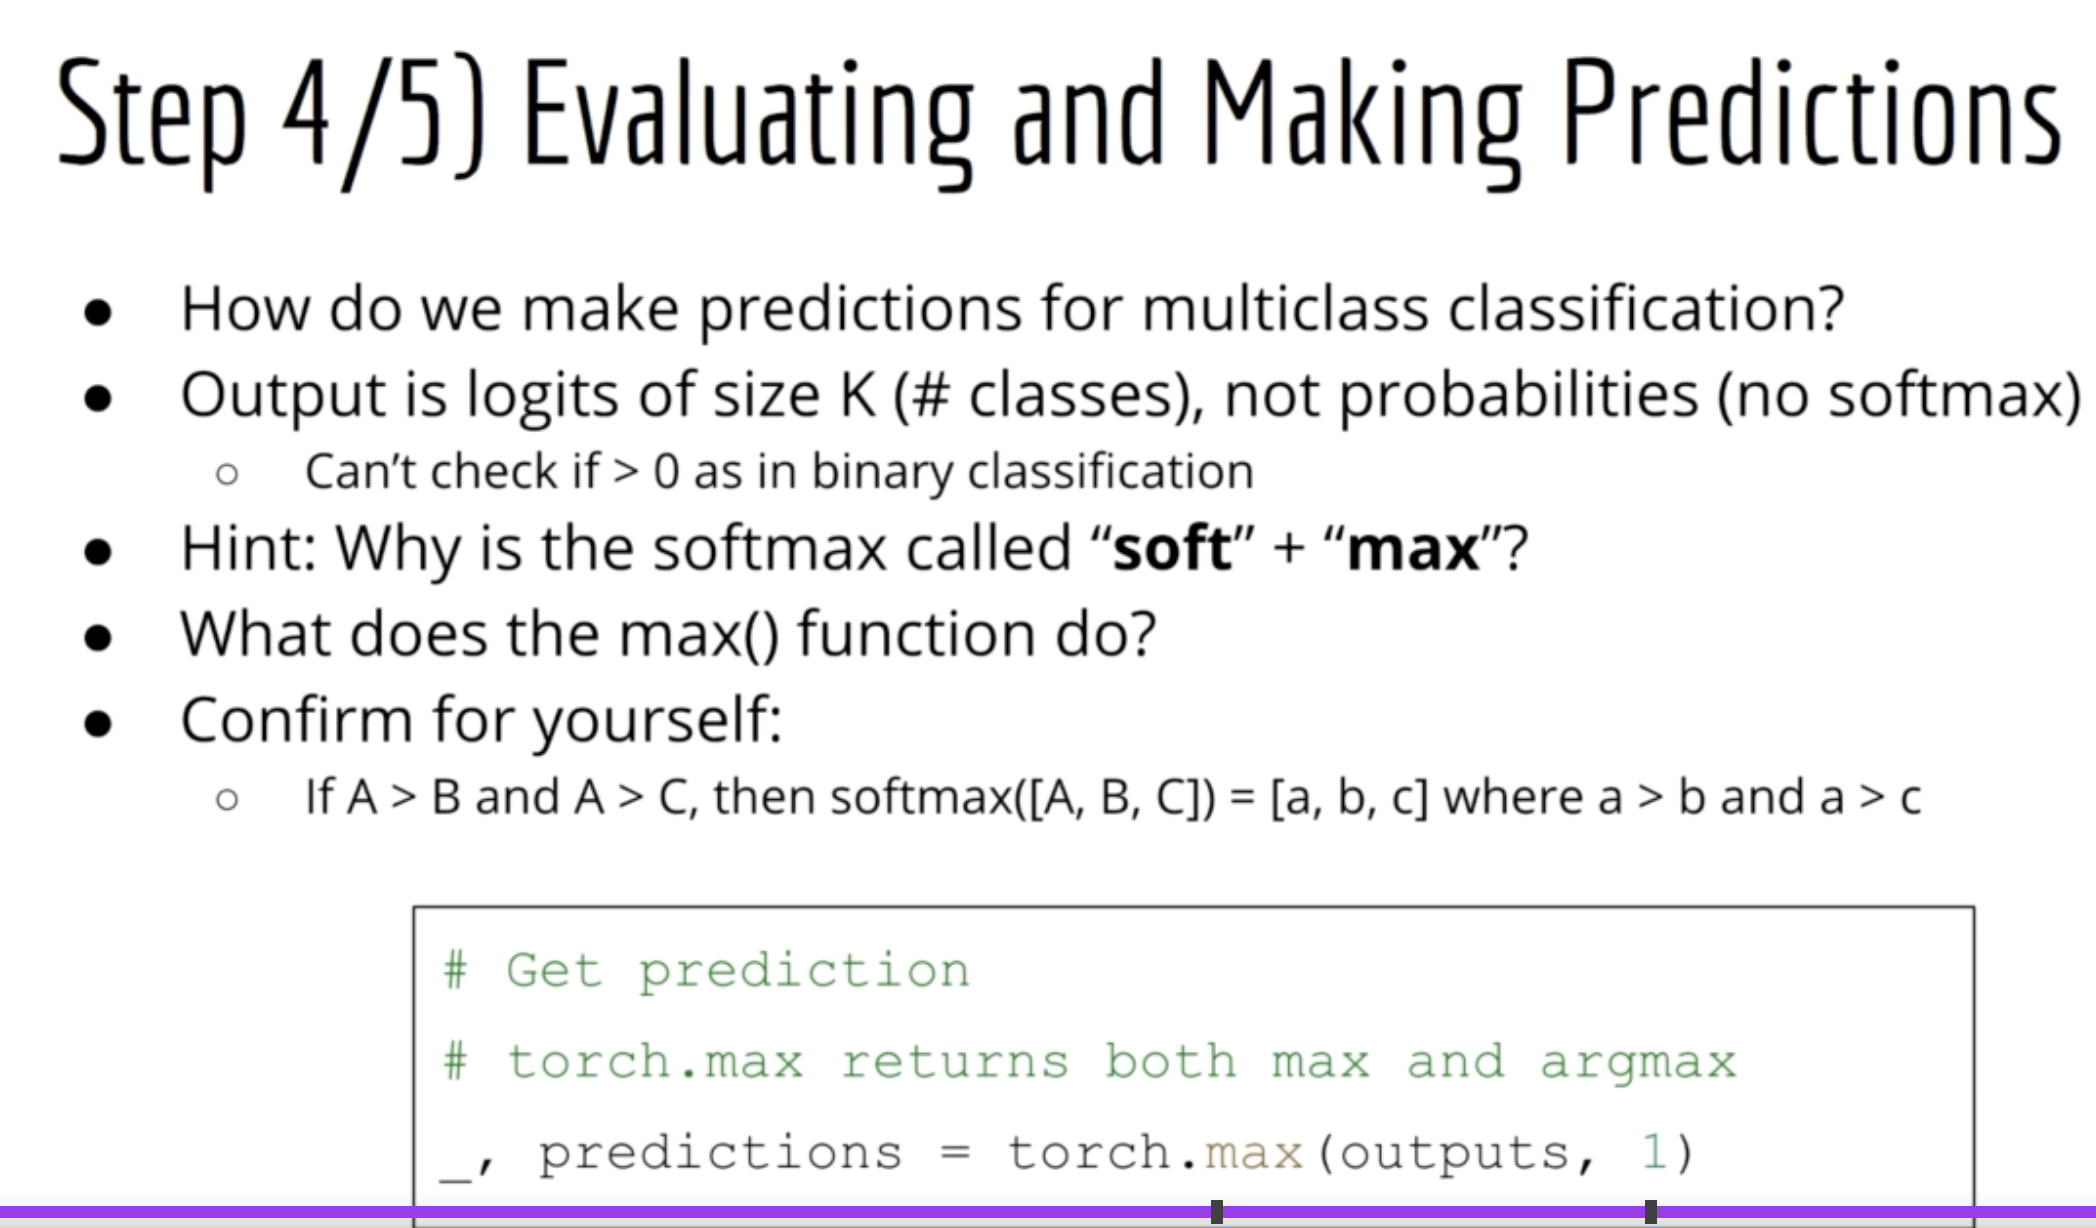

In [1]:
# Let's do the exercise

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [2]:
train_dataset = torchvision.datasets.MNIST(root='.', train=True, transform=transforms.ToTensor(), download=True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:02<00:00, 4771278.22it/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 133321.84it/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:06<00:00, 244372.00it/s]


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 4336564.71it/s]

Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



In [3]:
train_dataset.data

tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        ...,

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0,

In [4]:
train_dataset.data.max()

tensor(255, dtype=torch.uint8)

In [5]:
train_dataset.data.shape

torch.Size([60000, 28, 28])

In [6]:
test_dataset = torchvision.datasets.MNIST(root='.', train=False, transform=transforms.ToTensor(), download=True)
test_dataset.data.shape

torch.Size([10000, 28, 28])

In [7]:
# Build the model
model = nn.Sequential(
    nn.Linear(784, 128),
    nn.ReLU(),
    nn.Linear(128, 10),
)

# No need for SoftMax

In [8]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)
model.to(device)

cuda


Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=10, bias=True)
)

In [9]:
# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())

In [11]:
# Data loader
# Useful because it automatically generates batches in the training loop
# and takes care of shuffling
batch_size = 128
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

In [13]:
# Check out what the data loader does
# Maps the values to (0, 1)
# Makes the data of shape (batch_size, color, height, width)

tmp_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=1, shuffle=True)
for x, y in tmp_loader:
    print(x)
    print(y.shape)
    print(x.shape)
    break

tensor([[[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [14]:
train_dataset.transform(train_dataset.data.numpy()).max()

tensor(1.)

In [15]:
# Train the model
n_epochs = 10

# Stuff to store
train_losses = np.zeros(n_epochs)
test_losses = np.zeros(n_epochs)

for it in range(n_epochs):

  train_loss = []

  for inputs, targets in train_loader:

    # Move data to GPU
    inputs, targets = inputs.to(device), targets.to(device)

    # Reshape the input
    inputs = inputs.view(-1, 28*28)

    # Zero the parameter gradients
    optimizer.zero_grad()

    # Forward pass
    outputs = model(inputs)
    loss = criterion(outputs, targets)

    # Backward pass
    loss.backward()
    optimizer.step()

    train_loss.append(loss.item())

  # Get train loss and test loss
  train_loss = np.mean(train_loss) # a little misleading

  test_loss = []

  for inputs, targets in test_loader:
    inputs, targets = inputs.to(device), targets.to(device)
    inputs = inputs.view(-1, 28*28)

    outputs = model(inputs)
    loss = criterion(outputs, targets)
    test_loss.append(loss.item())

  test_loss = np.mean(test_loss)

  # Save losses
  train_losses[it] = train_loss
  test_losses[it] = test_loss

  print('Epoch: {} \tTraining Loss: {:.6f} \tTest Loss: {:.6f}'.format(it, train_loss, test_loss))

Epoch: 0 	Training Loss: 0.412334 	Test Loss: 0.228370
Epoch: 1 	Training Loss: 0.196622 	Test Loss: 0.161059
Epoch: 2 	Training Loss: 0.142488 	Test Loss: 0.128835
Epoch: 3 	Training Loss: 0.112132 	Test Loss: 0.109321
Epoch: 4 	Training Loss: 0.090750 	Test Loss: 0.095592
Epoch: 5 	Training Loss: 0.074826 	Test Loss: 0.090864
Epoch: 6 	Training Loss: 0.063799 	Test Loss: 0.078996
Epoch: 7 	Training Loss: 0.054016 	Test Loss: 0.083223
Epoch: 8 	Training Loss: 0.046250 	Test Loss: 0.086008
Epoch: 9 	Training Loss: 0.039733 	Test Loss: 0.076338


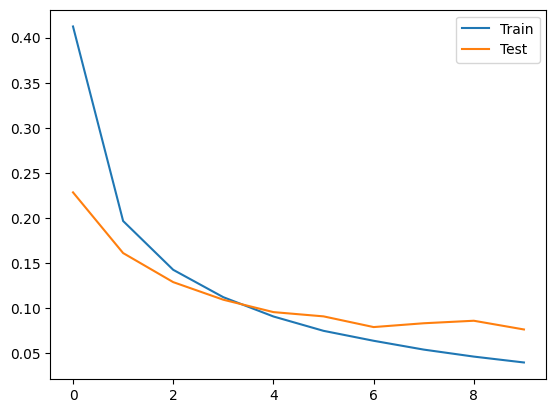

In [17]:
# Plot the train and test losses per iteration

plt.plot(train_losses, label='Train')
plt.plot(test_losses, label='Test')
plt.legend()
plt.show()

In [21]:
# Calculate accuracy

n_correct = 0
n_total = 0

for inputs, targets in train_loader:

  # Move data to GPU
  inputs, targets = inputs.to(device), targets.to(device)

  # Reshape the input
  inputs = inputs.view(-1, 28*28)

  # Forward pass
  outputs = model(inputs)

  # Get predictions
  # torch.max returns both max and argmax
  _, predictions = torch.max(outputs, 1)

  # Count correct predictions
  n_correct += (predictions == targets).sum().item()

  # Count total predictions
  n_total += predictions.shape[0]


train_acc = n_correct / n_total



In [19]:
n_correct = 0
n_total = 0

for inputs, targets in test_loader:

  # Move data to GPU
  inputs, targets = inputs.to(device), targets.to(device)

  # Reshape the input
  inputs = inputs.view(-1, 28*28)

  # Forward pass
  outputs = model(inputs)

  # Get predictions
  # torch.max returns both max and argmax
  _, predictions = torch.max(outputs, 1)

  # Count correct predictions
  n_correct += (predictions == targets).sum().item()

  # Count total predictions
  n_total += predictions.shape[0]


test_acc = n_correct / n_total

In [22]:
print('Train accuracy: {:.2f}%'.format(train_acc*100))
print('Test accuracy: {:.2f}%'.format(test_acc*100))

Train accuracy: 99.12%
Test accuracy: 97.65%


In [25]:
# Plot confusion matrix

from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

  """
     This function prints and plots the confusion matrix.
     Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized confusion matrix")
  else:
    print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

Confusion matrix, without normalization
[[ 972    0    0    1    1    1    0    0    2    3]
 [   0 1123    4    0    0    1    2    1    4    0]
 [   5    0 1009    1    3    0    2    6    6    0]
 [   0    1    6  981    1    4    1    4    6    6]
 [   2    1    5    0  951    0    2    3    2   16]
 [   2    0    0    6    1  871    4    0    6    2]
 [   8    3    1    0    3    4  937    0    2    0]
 [   1    6    7    4    0    0    0  990    5   15]
 [   9    1    1    2    2    3    3    2  946    5]
 [   2    3    0    5    6    2    1    1    4  985]]


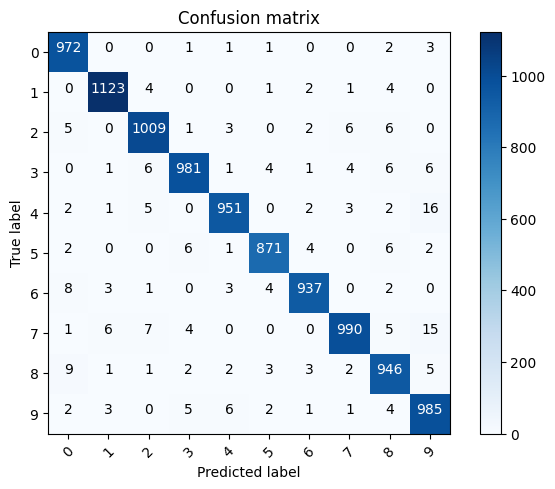

In [26]:
# Get all predictions in an array and plot confusion matrix

x_test = test_dataset.data.numpy()
y_test = test_dataset.targets.numpy()
p_test = np.array([])

for inputs, targets in test_loader:
  inputs, targets = inputs.to(device), targets.to(device)
  inputs = inputs.view(-1, 28*28)
  outputs = model(inputs)
  _, predictions = torch.max(outputs, 1)

  p_test = np.concatenate((p_test, predictions.cpu().numpy()))

cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

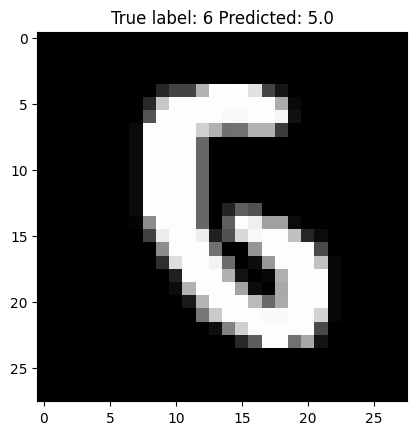

In [31]:
# Show some misclassified examples

misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));